# COVID-19 in Australia (from covidlive.com.au)

NOTE: Because the [covidlive](https://covidlive.com.au/) database is being updated throughout the day, it only makes sense to run this notebook at the end of the day when all of the data has been loaded for the day. In the last cell of this notebook, I warn where last-day data is missing (or looks odd), but this is imperfect.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span><ul class="toc-item"><li><span><a href="#Usual-imports-etc." data-toc-modified-id="Usual-imports-etc.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Usual imports etc.</a></span></li><li><span><a href="#Other-useful-information" data-toc-modified-id="Other-useful-information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other useful information</a></span></li><li><span><a href="#Warnings" data-toc-modified-id="Warnings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Warnings</a></span></li><li><span><a href="#State-populations-and-per-capita-calculations" data-toc-modified-id="State-populations-and-per-capita-calculations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>State populations and per capita calculations</a></span></li></ul></li><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Useful functions</a></span><ul class="toc-item"><li><span><a href="#Bar-charts---count-and-rate-per-capita" data-toc-modified-id="Bar-charts---count-and-rate-per-capita-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bar charts - count and rate per capita</a></span></li><li><span><a href="#State-line-plots" data-toc-modified-id="State-line-plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>State line plots</a></span></li></ul></li><li><span><a href="#Get-the-data-from-covidlive.com" data-toc-modified-id="Get-the-data-from-covidlive.com-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data from covidlive.com</a></span></li><li><span><a href="#Capture-cumulative-and-daily-data-for-selected-columns" data-toc-modified-id="Capture-cumulative-and-daily-data-for-selected-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Capture cumulative and daily data for selected columns</a></span><ul class="toc-item"><li><span><a href="#Extraction" data-toc-modified-id="Extraction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Extraction</a></span></li><li><span><a href="#Supporting-functions-for-accessing-the-corrected-data-for-a-period" data-toc-modified-id="Supporting-functions-for-accessing-the-corrected-data-for-a-period-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Supporting functions for accessing the corrected data for a period</a></span></li></ul></li><li><span><a href="#Weekly-charts" data-toc-modified-id="Weekly-charts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Weekly charts</a></span></li><li><span><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bar Charts</a></span></li><li><span><a href="#Active-Cases" data-toc-modified-id="Active-Cases-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Active Cases</a></span><ul class="toc-item"><li><span><a href="#Bar-chart-of-active-cases" data-toc-modified-id="Bar-chart-of-active-cases-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Bar chart of active cases</a></span></li><li><span><a href="#Active-cases---line-plots" data-toc-modified-id="Active-cases---line-plots-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Active cases - line plots</a></span></li><li><span><a href="#A-look-at-Active-Case-Counts---anticiptaed-vs-actual" data-toc-modified-id="A-look-at-Active-Case-Counts---anticiptaed-vs-actual-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>A look at Active Case Counts - anticiptaed vs actual</a></span></li></ul></li><li><span><a href="#Explore-cases-to-deaths" data-toc-modified-id="Explore-cases-to-deaths-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Explore cases to deaths</a></span><ul class="toc-item"><li><span><a href="#Establish-periods" data-toc-modified-id="Establish-periods-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Establish periods</a></span></li><li><span><a href="#supporting-functions" data-toc-modified-id="supporting-functions-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>supporting functions</a></span></li><li><span><a href="#Daily-deaths-in-period" data-toc-modified-id="Daily-deaths-in-period-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Daily deaths in period</a></span></li><li><span><a href="#Establish-historical-baseline" data-toc-modified-id="Establish-historical-baseline-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Establish historical baseline</a></span></li><li><span><a href="#Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak" data-toc-modified-id="Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Use above baseline to look at the recent Sydney Delta outbreak</a></span></li><li><span><a href="#Running-cumulative-death-rates-for-outbreaks" data-toc-modified-id="Running-cumulative-death-rates-for-outbreaks-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Running cumulative death rates for outbreaks</a></span></li><li><span><a href="#Cumulative-deaths-for-outbreaks" data-toc-modified-id="Cumulative-deaths-for-outbreaks-8.7"><span class="toc-item-num">8.7&nbsp;&nbsp;</span>Cumulative deaths for outbreaks</a></span></li><li><span><a href="#Rolling-death-rates-for-outbreaks" data-toc-modified-id="Rolling-death-rates-for-outbreaks-8.8"><span class="toc-item-num">8.8&nbsp;&nbsp;</span>Rolling death rates for outbreaks</a></span></li></ul></li><li><span><a href="#Vaccination-plots" data-toc-modified-id="Vaccination-plots-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Vaccination plots</a></span><ul class="toc-item"><li><span><a href="#Get-data" data-toc-modified-id="Get-data-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Get data</a></span></li><li><span><a href="#Data-checking" data-toc-modified-id="Data-checking-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Data checking</a></span></li><li><span><a href="#Bar-plots" data-toc-modified-id="Bar-plots-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Bar plots</a></span></li><li><span><a href="#Timeline-plots---first-doses" data-toc-modified-id="Timeline-plots---first-doses-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Timeline plots - first doses</a></span></li></ul></li><li><span><a href="#Hospitalised" data-toc-modified-id="Hospitalised-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Hospitalised</a></span><ul class="toc-item"><li><span><a href="#Hospitalised-Bar-Charts" data-toc-modified-id="Hospitalised-Bar-Charts-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Hospitalised Bar Charts</a></span></li><li><span><a href="#Hospitalised-line-plots" data-toc-modified-id="Hospitalised-line-plots-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Hospitalised line plots</a></span></li><li><span><a href="#Hospitalised-as-a-proportion-of-active-cases" data-toc-modified-id="Hospitalised-as-a-proportion-of-active-cases-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Hospitalised as a proportion of active cases</a></span></li></ul></li><li><span><a href="#Source-of-infection" data-toc-modified-id="Source-of-infection-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Source of infection</a></span><ul class="toc-item"><li><span><a href="#Extraction" data-toc-modified-id="Extraction-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Extraction</a></span></li><li><span><a href="#Check-latest-raw-SOI-data-against-raw-case-count-data" data-toc-modified-id="Check-latest-raw-SOI-data-against-raw-case-count-data-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Check latest raw SOI data against raw case count data</a></span></li><li><span><a href="#Plot-national-SOI" data-toc-modified-id="Plot-national-SOI-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Plot national SOI</a></span></li><li><span><a href="#Plot-cases-under-investigation-by-state" data-toc-modified-id="Plot-cases-under-investigation-by-state-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Plot cases under investigation by state</a></span></li></ul></li><li><span><a href="#Local-cases/transmission" data-toc-modified-id="Local-cases/transmission-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Local cases/transmission</a></span><ul class="toc-item"><li><span><a href="#Create-dataframes-for-local-transmission" data-toc-modified-id="Create-dataframes-for-local-transmission-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Create dataframes for local transmission</a></span></li><li><span><a href="#Bar-charts-cumulative-local-transmission" data-toc-modified-id="Bar-charts-cumulative-local-transmission-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Bar charts cumulative local transmission</a></span></li><li><span><a href="#Weekly-charts-for-local-transmission" data-toc-modified-id="Weekly-charts-for-local-transmission-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Weekly charts for local transmission</a></span></li><li><span><a href="#Recent-local-transmission-daily-charts" data-toc-modified-id="Recent-local-transmission-daily-charts-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>Recent local transmission daily charts</a></span></li></ul></li><li><span><a href="#Local-outbreaks" data-toc-modified-id="Local-outbreaks-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Local outbreaks</a></span><ul class="toc-item"><li><span><a href="#Supporting-functions" data-toc-modified-id="Supporting-functions-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Supporting functions</a></span></li><li><span><a href="#Named-outbreaks" data-toc-modified-id="Named-outbreaks-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Named outbreaks</a></span></li><li><span><a href="#Outbreaks-on-a-log-scale" data-toc-modified-id="Outbreaks-on-a-log-scale-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>Outbreaks on a log scale</a></span></li><li><span><a href="#Multi-growth-paths" data-toc-modified-id="Multi-growth-paths-13.4"><span class="toc-item-num">13.4&nbsp;&nbsp;</span>Multi-growth paths</a></span></li></ul></li><li><span><a href="#Outbreak-Growth-Factors" data-toc-modified-id="Outbreak-Growth-Factors-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Outbreak Growth Factors</a></span><ul class="toc-item"><li><span><a href="#Rolling-doubling-time" data-toc-modified-id="Rolling-doubling-time-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Rolling doubling time</a></span></li><li><span><a href="#Growth-Factors" data-toc-modified-id="Growth-Factors-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>Growth Factors</a></span></li><li><span><a href="#Model-for-the-effective-reproduction-number-$R_t$-using-an-SIR/SEIR-model" data-toc-modified-id="Model-for-the-effective-reproduction-number-$R_t$-using-an-SIR/SEIR-model-14.3"><span class="toc-item-num">14.3&nbsp;&nbsp;</span>Model for the effective reproduction number $R_t$ using an SIR/SEIR model</a></span></li><li><span><a href="#Comparative-$R_t$-and-GF" data-toc-modified-id="Comparative-$R_t$-and-GF-14.4"><span class="toc-item-num">14.4&nbsp;&nbsp;</span>Comparative $R_t$ and GF</a></span></li><li><span><a href="#Short-run-projections-for-local-new-case-growth" data-toc-modified-id="Short-run-projections-for-local-new-case-growth-14.5"><span class="toc-item-num">14.5&nbsp;&nbsp;</span>Short-run projections for local new case growth</a></span></li></ul></li><li><span><a href="#The-End" data-toc-modified-id="The-End-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Python set-up

### Usual imports etc.

In [1]:
# global imports
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
import matplotlib.dates as mdates
import datetime

from pathlib import Path
from typing import Dict, List

# local imports
sys.path.append(r'../bin')
import plotstuff as ps
import Henderson

# pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting
plt.style.use('ggplot')

# matplotlib stuff for date formatting xticklabels
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter
munits.registry[pd.Timestamp] = converter
munits.registry[pd.Period] = converter

### Other useful information

In [2]:
# save location
CHART_DIRECTORY = '../charts'
Path(CHART_DIRECTORY).mkdir(parents=True, exist_ok=True)
CHART_DIRECTORY += '/!AS2-'

SOURCE = 'Source: https://covidlive.com.au/'

AU_COLOURS = ['#dd0000', 'darkorange', 'gold', 'seagreen',
              'dodgerblue', 'blue', 'mediumorchid', 'hotpink',
              '#555555']  
state_order = ['NSW', 'Victoria', 'Queensland', 'WA', 
             'SA', 'Tasmania', 'ACT', 'NT']

# used in charts of the recent period
RECENT = 112 # days

# standard plot settings - used in calls to ps.finalise_plot()
std_barchart_settings ={
    'chart_directory': CHART_DIRECTORY,
    'rfooter': SOURCE,
    'show': True,
}

std_plot_settings = {
    'margins': 0.025,
    **std_barchart_settings, 
}

### Warnings

In [3]:
warning_count = 0
warnings = set()

def warn(message: str) -> None:
    global warning_count
    if message:
        if message not in warnings:
            warning_count += 1
        print(message)
        warnings.add(message)
    return None

def print_warnings() -> None:
    if warning_count == 0:
        return None
    
    print(f'NOTE: {warning_count} warning{"s" if warning_count > 1 else ""}')

    [print(m) for m in warnings]
    return None

### State populations and per capita calculations

In [4]:
# data compiled from ABS tables for age by year by state
# https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/dec-2020#data-download
# see notebook in directory ../abs, which generates the dictionaries below. 

# Constants across all tests
state_pop = {
    'NSW': 8167893,
    'Victoria': 6696630,
    'Queensland': 5176044,
    'SA': 1770494,
    'WA': 2663976,
    'Tasmania': 540781,
    'NT': 246283,
    'ACT': 431325
}
state_pop["Australia"] = sum(state_pop.values())
print(f'Australian population: {state_pop["Australia"]:,}')

eligible_pop = {
    'NSW': 6566161,
    'Victoria': 5407615,
    'Queensland': 4112639,
    'SA': 1440565,
    'WA': 2115458,
    'Tasmania': 440196,
    'NT': 190705,
    'ACT': 344013
}
eligible_pop["Australia"] = sum(eligible_pop.values())
print(f'Australian eligible population: {eligible_pop["Australia"]:,}')

# per capita ...
power = 6
power_conversion = {
    0:  'Unit',
    3:  'Thousand',
    6:  'Million', # beyond here is a bit silly ...
    9:  'Billion', 
    12: 'Trillion',
    15: 'Quadrillion',
    18: 'Quintillion',
}
if power not in power_conversion.keys():
    power = 6
power_text = power_conversion[power]
factor = 10 ** power
state_pop = pd.Series(state_pop) / factor
eligible_pop =  pd.Series(eligible_pop) / factor

Australian population: 25,693,426
Australian eligible population: 20,617,352


## Useful functions

### Bar charts - count and rate per capita 

In [5]:
name_map = {
    'NSW': 'NSW',
    'Victoria': 'Vic',
    'Queensland': 'Qld',
    'WA': 'WA',
    'SA': 'SA',
    'Tasmania': 'Tas',
    'NT': 'NT',
    'ACT': 'ACT',
    'Australia': 'Australia'
}

def two_bar_plots(data_dict, item, prefix, desc,
                  pop_series=state_pop,
                  pop_label='population',
                  **kwargs):
    """latest cumulative and cumulative per population charts
       Note: incomplete data on the last day is navigated."""
    
    # get latest valid data with date of validity
    frame = data_dict[item]
    last_valid = frame.apply(pd.Series.last_valid_index)
    last_valid = (
        (last_valid.dt.day.astype(str) 
         + '-' 
         + (last_valid.dt.month_name().astype(str)))
        .str[:6]
    )
    last_data = frame.ffill().iloc[-1]
    last_data_pc = (last_data / pop_series).round(1)
    last_data_pc = last_data_pc[last_data.index]
    
    serieses = (last_data.astype(int), last_data_pc)
    suffixes = ('', f' per {power_text.lower()} {pop_label}')
    xlabels = ('Count', 'Rate')
    
    for series, suffix, xlabel in zip(serieses, suffixes, xlabels):
        series.index = series.index.map(name_map) + ' ' + last_valid
        series = series.sort_values()
        ps.plot_barh(series, 
                     title=f'{prefix} COVID19 {desc}{suffix}'.strip(),
                     xlabel=xlabel,
                     **std_barchart_settings, 
                     **kwargs,
                    )


### State line plots

In [6]:
def line_plots(table, title, ylabel):
    
    # standard colours for states
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
    order = state_order
    
    # plot
    for recent in [0, RECENT]:
        data = table.iloc[-recent:]
        
        fig, ax = plt.subplots()
        for state in order:
            line = data[state]
            ax.plot(line.index, line.values, label=state, lw=2.5)

        ax.legend(loc='best')
        title_extra = '' if recent == 0 else ' (recent)'
                
        ps.finalise_plot(
            ax, 
            title=title+title_extra, 
            xlabel=None,
            ylabel=ylabel,
            **std_plot_settings,
        )   

## Get the data from covidlive.com

In [7]:
def get_data_from_JSON():
    """ Get the latest data from covidlive.com.au
        Return the complete DataFrame downloaded 
        from covidlive.com.au, using the JSON API"""
    
    # get the data
    url = 'https://covidlive.com.au/covid-live.json'
    data = pd.read_json(url)

    # convert REPORT_DATE to pandas Series of datetime64 items
    data.REPORT_DATE = pd.to_datetime(data.REPORT_DATE)
        
    # issue a warning if records exist ahead of today
    today = pd.Timestamp(datetime.datetime.now().date())
    if (data.REPORT_DATE > today).any():
        warn(f'Warning: There are records into the future?')
        all_frame = all_frame[data.REPORT_DATE <= today]

    # return
    return data

In [8]:
# obtain the latest data ...
raw_json_data = get_data_from_JSON()

In [9]:
# Quick peak at the data columns
raw_json_data.columns  

Index(['REPORT_DATE', 'LAST_UPDATED_DATE', 'CODE', 'NAME', 'CASE_CNT',
       'TEST_CNT', 'DEATH_CNT', 'RECOV_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT',
       'MED_HOSP_CNT', 'SRC_OVERSEAS_CNT', 'SRC_INTERSTATE_CNT',
       'SRC_CONTACT_CNT', 'SRC_UNKNOWN_CNT', 'SRC_INVES_CNT', 'PREV_CASE_CNT',
       'PREV_TEST_CNT', 'PREV_DEATH_CNT', 'PREV_RECOV_CNT', 'PREV_MED_ICU_CNT',
       'PREV_MED_VENT_CNT', 'PREV_MED_HOSP_CNT', 'PREV_SRC_OVERSEAS_CNT',
       'PREV_SRC_INTERSTATE_CNT', 'PREV_SRC_CONTACT_CNT',
       'PREV_SRC_UNKNOWN_CNT', 'PREV_SRC_INVES_CNT', 'PROB_CASE_CNT',
       'PREV_PROB_CASE_CNT', 'ACTIVE_CNT', 'PREV_ACTIVE_CNT', 'NEW_CASE_CNT',
       'PREV_NEW_CASE_CNT', 'VACC_DIST_CNT', 'PREV_VACC_DIST_CNT',
       'VACC_DOSE_CNT', 'PREV_VACC_DOSE_CNT', 'VACC_PEOPLE_CNT',
       'PREV_VACC_PEOPLE_CNT', 'VACC_AGED_CARE_CNT', 'PREV_VACC_AGED_CARE_CNT',
       'VACC_GP_CNT', 'PREV_VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',
       'PREV_VACC_FIRST_DOSE_CNT', 'VACC_FIRST_DOSE_CNT_12_15',
       '

In [10]:
# Quick look at the categorising column
raw_json_data.NAME.unique()

array(['Australia', 'NSW', 'Victoria', 'Queensland', 'WA', 'SA',
       'Tasmania', 'ACT', 'NT'], dtype=object)

In [11]:
raw_json_data.CODE.unique()

array(['AUS', 'NSW', 'VIC', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT'],
      dtype=object)

## Capture cumulative and daily data for selected columns

### Extraction

In [12]:
selected_cols = {
    # column name      # plain English for charts
    'CASE_CNT':        'cases',
    'DEATH_CNT':       'deaths',
    'TEST_CNT':        'tests',
    'VACC_DOSE_CNT':   'vacc doses',
}

In [13]:
def get_pivot_table(raw_json_data, item):
    """Return a DataFrame of data for the specified item from the raw_json_data
       The columns will be Australian states, plus the Australian total.
       The rows will be dates, in ascending date order.
       Provide warnings for mallformed data."""

    table = (
        raw_json_data
        .pivot(index='REPORT_DATE', columns='NAME', values=item)
        .sort_index(ascending=True)
    )
    
    # if state totals have NaNs, change a non-NaN 'Australia' to NaN
    states = table.columns.to_list()
    if 'Australia' in states:
        states.remove('Australia')
        odd_rows = table[states].isna().any(axis=1) & table['Australia'].notna()
        if odd_rows.any():
            fix_these_rows = odd_rows[odd_rows].index
            #warn(f'Nullifying these Australian totals in {item} '
            #     f'{fix_these_rows.to_list()}')
            table.loc[fix_these_rows, 'Australia'] = np.nan
    
    # drop all-NaN rows
    missing_rows = table.isna().all(axis=1)
    if missing_rows.any():
        drop_these_rows = missing_rows[missing_rows].index
        #warn(f'Dropping all-NaN rows from {item}: {drop_these_rows.to_list()}')
        table.drop(drop_these_rows, inplace=True)
    
    # check if missing values in last row (but not missing in penultimate row)
    situation = table.iloc[-1].isna() & table.iloc[-2].notna()
    if situation.sum():
        warn(f'We are missing the latest {item} '
             f'for {", ".join(situation[situation].index.to_list())}')

    # check if last cumulative value is less than its predecessor ...
    not_max = table.iloc[-1] < table.iloc[-2]
    if not_max.sum():
        warn(f'Lastest value less than its predecessor in {item} '
             f'for {", ".join(not_max[not_max].index.to_list())}')

    return (table)

In [14]:
def get_item(item, raw_json_data):
    """Return a DataFrame dates-x-states for item.
       Ensure early NaNs are mapped to zero.
       But keep any NaNs at the end of the table."""
    
    
    raw = get_pivot_table(raw_json_data, item)
    end_nan_mask = raw.isna().astype(float).replace(1.0, np.nan).bfill().isna()
    
    data = (
        raw
        .ffill()
        .fillna(0)
        .where(~end_nan_mask, other=np.nan)
    )

    return data

In [15]:
def get_data_with_adjustments():
    cum_u = {}
    daily_u = {}
    daily_c = {}
    cum_c = {}

    for item in selected_cols.keys():
        # get the raw cumulative data
        cum_u[item] = get_item(item, raw_json_data)

        # adjusted daily and cumulative data (for corrections)
        daily_u[item], daily_c[item], cum_c[item] = (
            ps.dataframe_correction(cum_u[item], verbose=False)
        )
        
    return cum_u, daily_u, daily_c, cum_c
        
cum_u, daily_u, daily_c, cum_c = get_data_with_adjustments()

In [16]:
# Check - raw daily new cases  
cum_u['CASE_CNT'].diff()[-5:]

NAME          ACT  Australia     NSW   NT  Queensland   SA  Tasmania  \
REPORT_DATE                                                            
2021-09-22   17.0     1662.0  1021.0  2.0         1.0  1.0       0.0   
2021-09-23   16.0     1807.0  1043.0  0.0         2.0  1.0       0.0   
2021-09-24   19.0     1764.0  1026.0  0.0         0.0  0.0       0.0   
2021-09-25   32.0     1864.0   995.0  0.0         1.0  0.0       0.0   
2021-09-26   25.0     1732.0   948.0  0.0         0.0  1.0       0.0   

NAME         Victoria   WA  
REPORT_DATE                 
2021-09-22      620.0  0.0  
2021-09-23      745.0  0.0  
2021-09-24      718.0  1.0  
2021-09-25      836.0  0.0  
2021-09-26      758.0  0.0

### Supporting functions for accessing the corrected data for a period

In [17]:
def _prune(series, start, stop):
    s = series[series.index >= pd.Timestamp(start)]
    if stop:
        s = s[s.index <= pd.Timestamp(stop)]
    return s
    
def _get_data(item, state, start, stop):
    data = (
        daily_c[item][state]
        .dropna() # for NaNs at series end
    )
    return _prune(data, start, stop)

def _get_data_direct(item, state, start, stop):
    data = (
        get_item(item, raw_json_data)[state]
        .dropna()
    )
    return _prune(data, start, stop)

## Weekly charts

In [18]:
# Check - cooked daily new cases  
daily_c['CASE_CNT'].tail()

NAME          ACT  Australia     NSW   NT  Queensland   SA  Tasmania  \
REPORT_DATE                                                            
2021-09-22   17.0     1662.0  1021.0  2.0         1.0  1.0       0.0   
2021-09-23   16.0     1807.0  1043.0  0.0         2.0  1.0       0.0   
2021-09-24   19.0     1764.0  1026.0  0.0         0.0  0.0       0.0   
2021-09-25   32.0     1864.0   995.0  0.0         1.0  0.0       0.0   
2021-09-26   25.0     1732.0   948.0  0.0         0.0  1.0       0.0   

NAME         Victoria   WA  
REPORT_DATE                 
2021-09-22      620.0  0.0  
2021-09-23      745.0  0.0  
2021-09-24      718.0  1.0  
2021-09-25      836.0  0.0  
2021-09-26      758.0  0.0

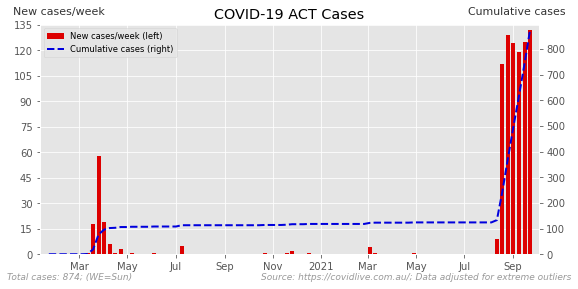

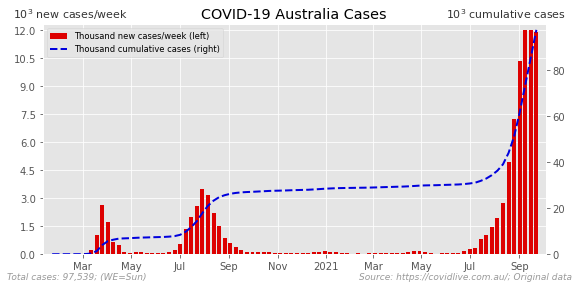

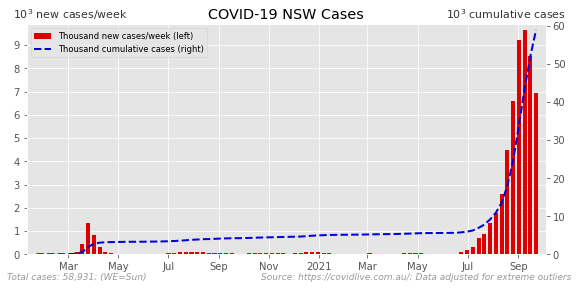

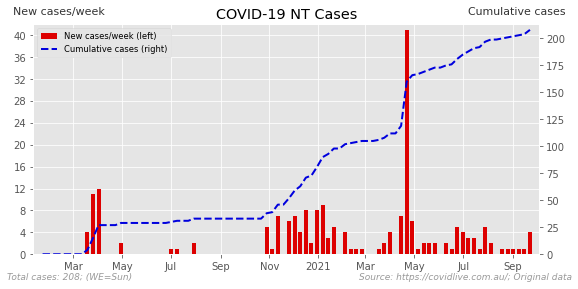

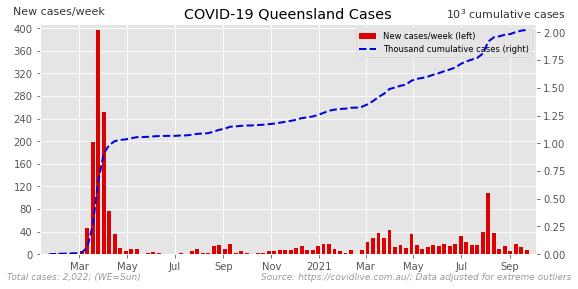

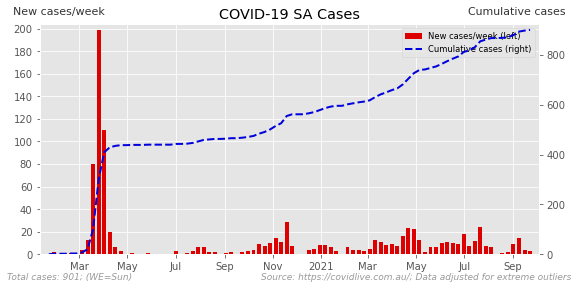

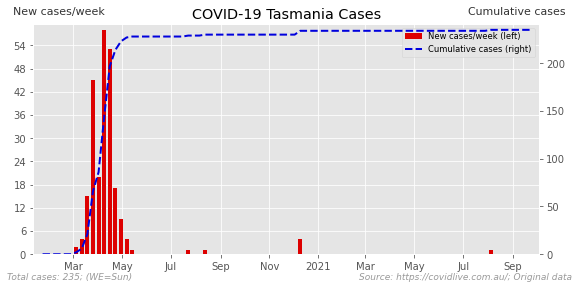

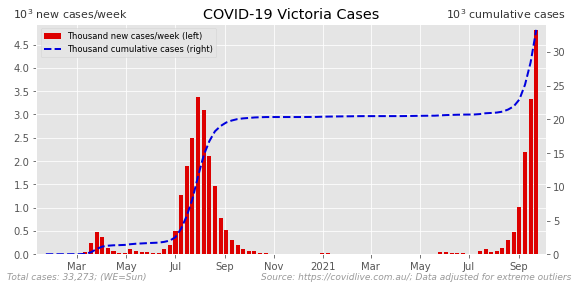

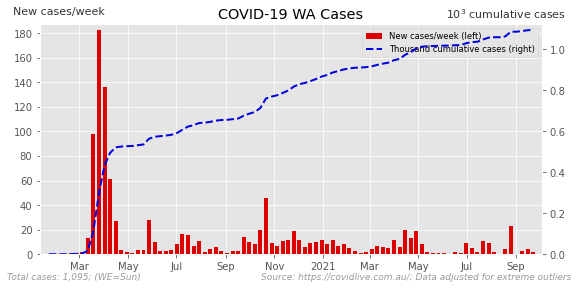

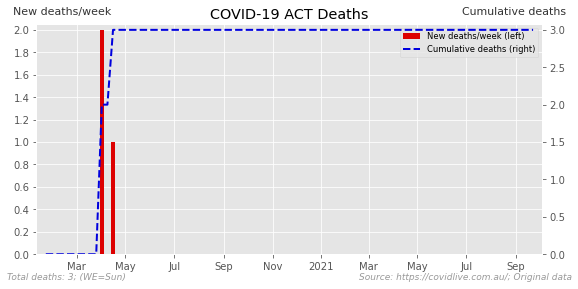

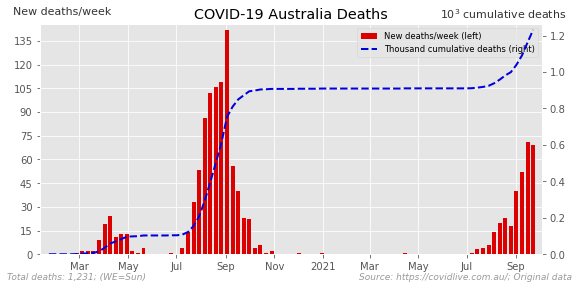

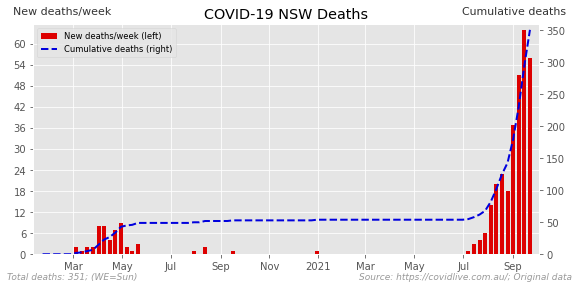

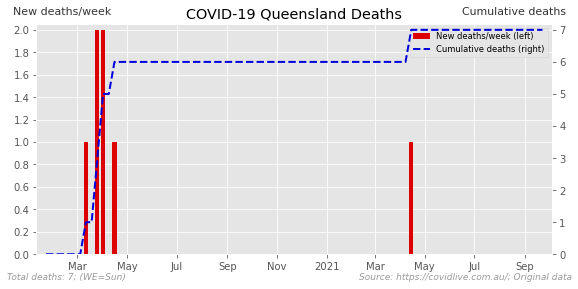

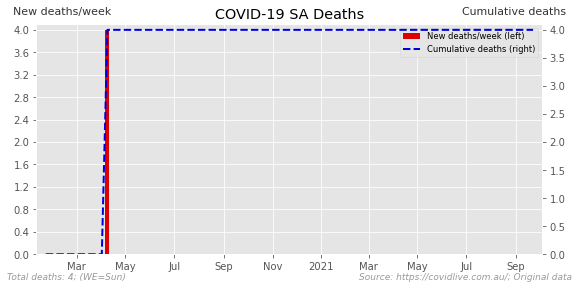

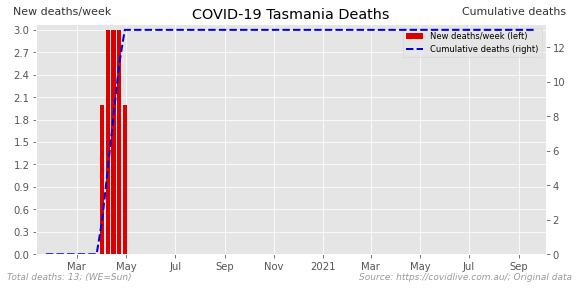

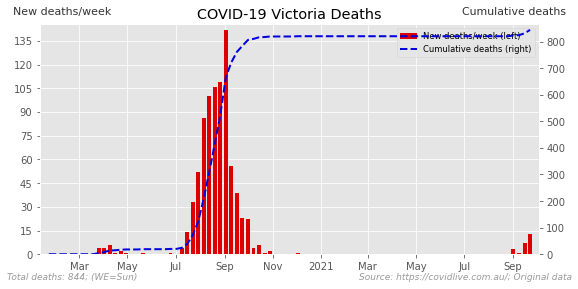

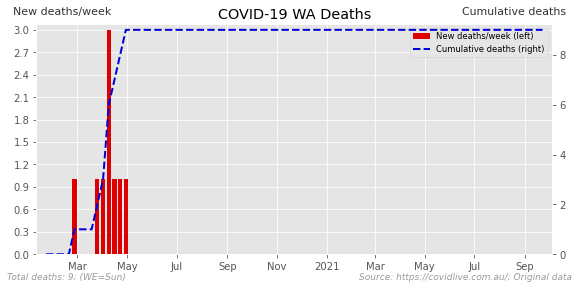

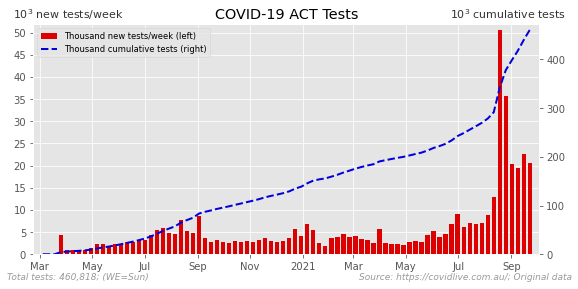

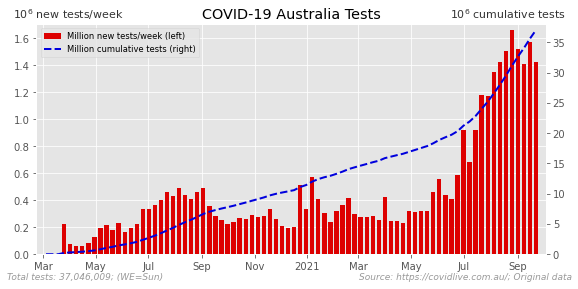

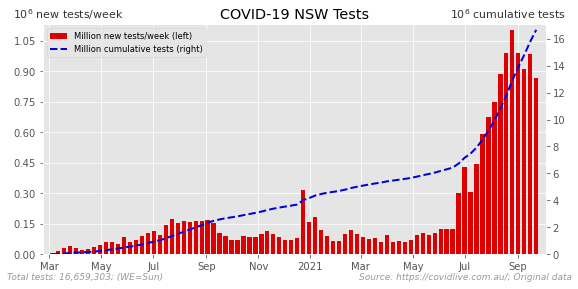

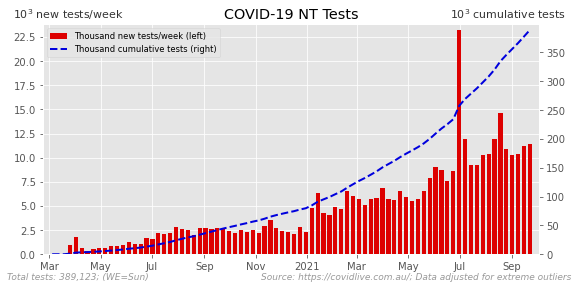

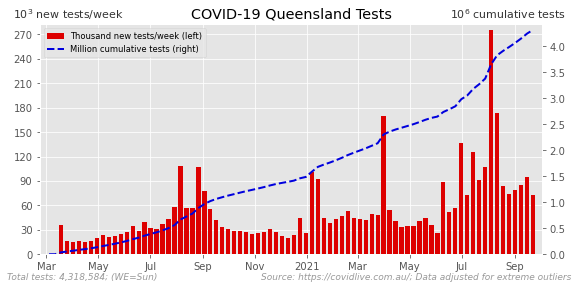

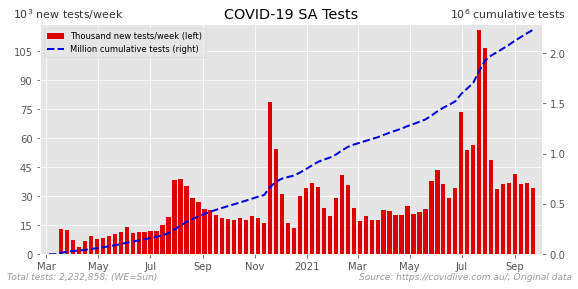

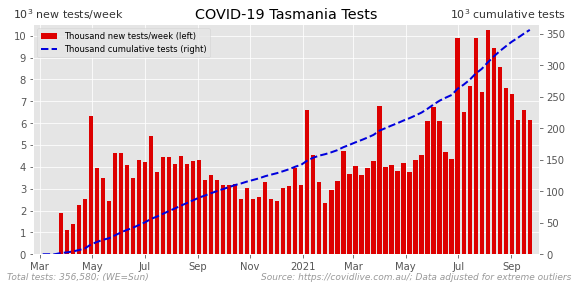

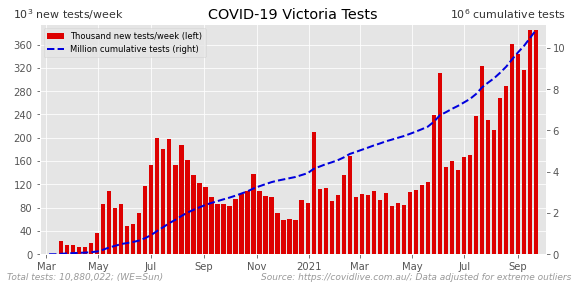

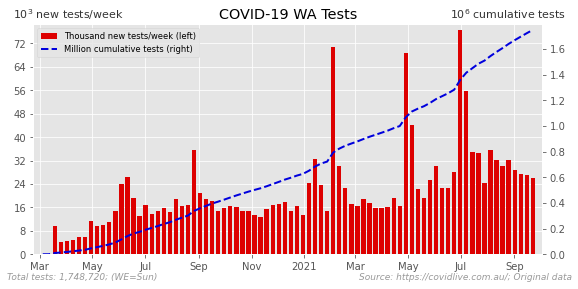

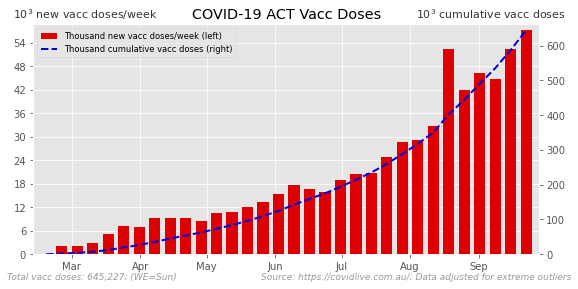

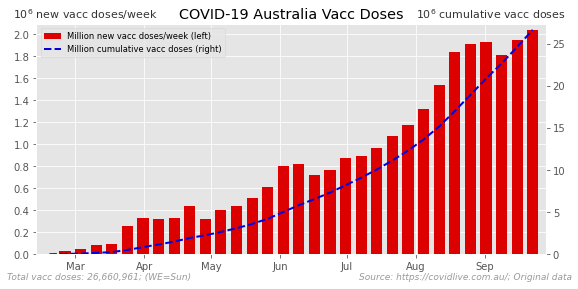

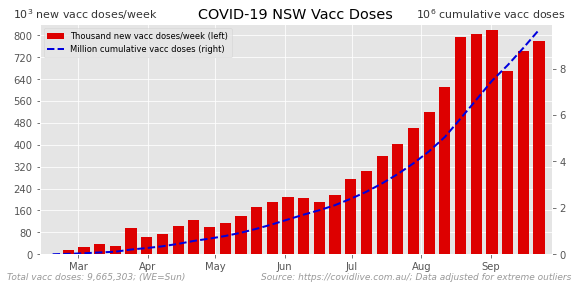

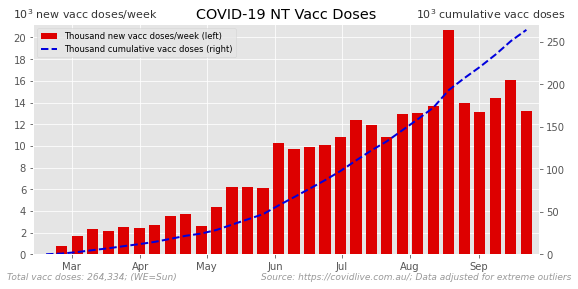

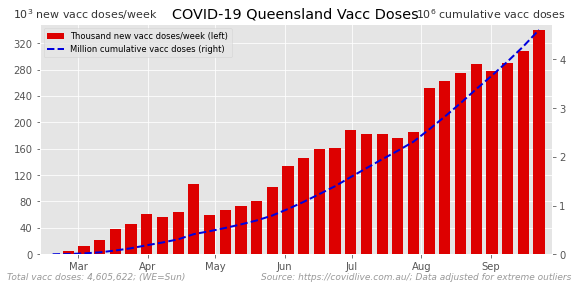

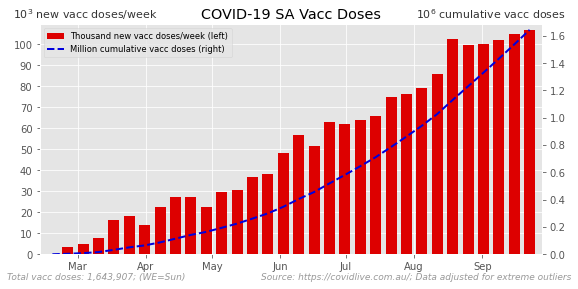

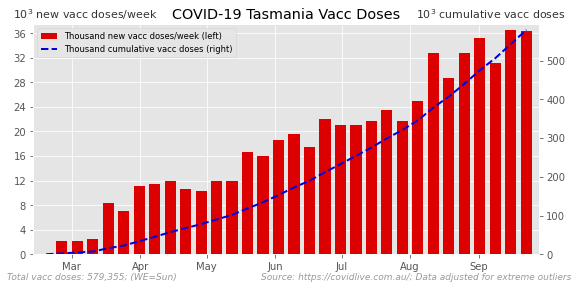

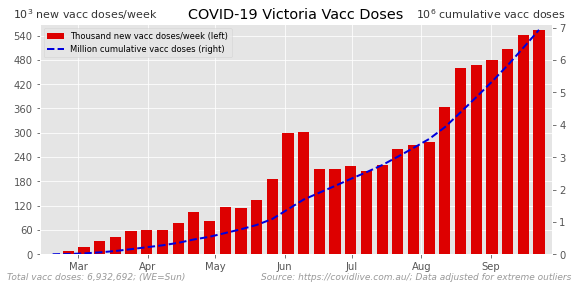

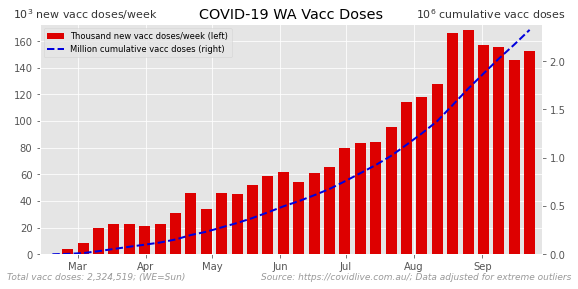

In [19]:
for item, desc in selected_cols.items():
    
    quality = pd.Series(dtype=str)
    for state in daily_u[item].columns:
        if (daily_u[item][state] == daily_c[item][state]).all():
            quality[state] = f'{SOURCE}; Original data'
        else:
            quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'
    
    
    daily = daily_c[item]
    ps.plot_weekly(
                   daily, desc, quality, 
                   chart_directory=CHART_DIRECTORY+'-!weekly-',
                   show=True,
                  )

## Bar Charts

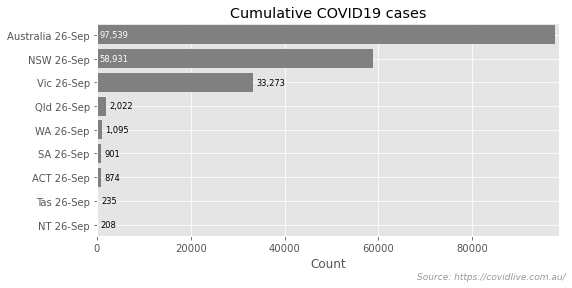

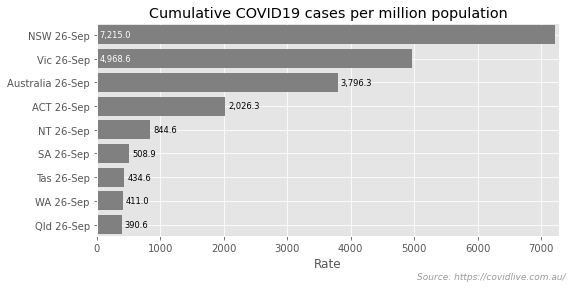

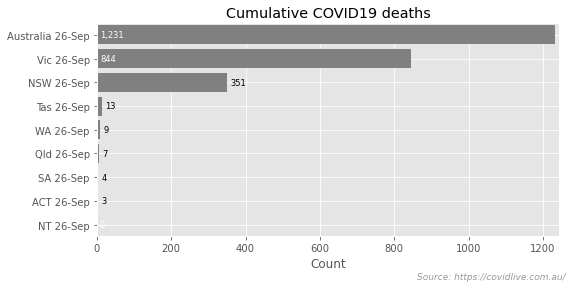

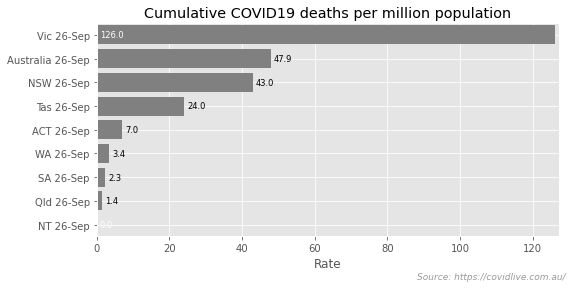

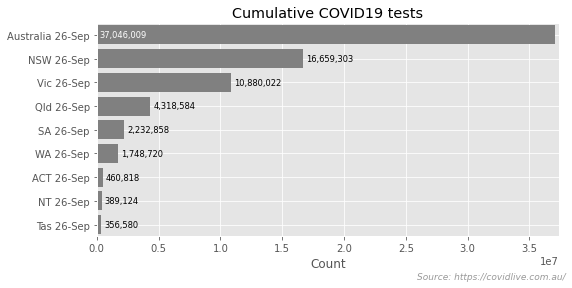

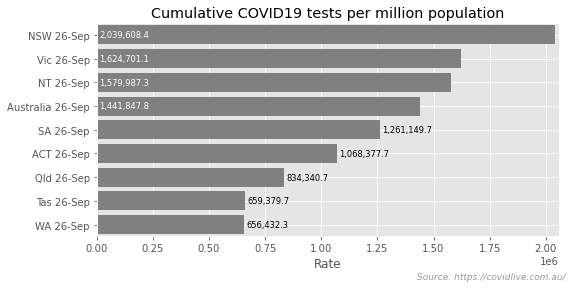

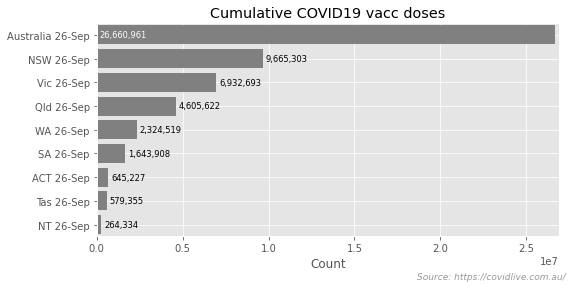

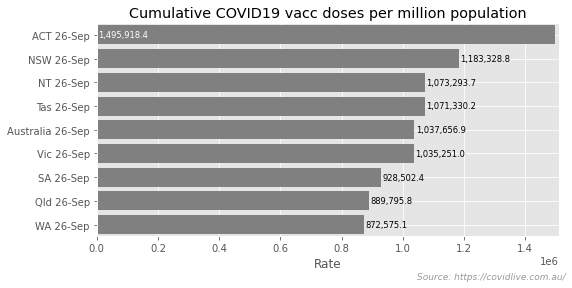

In [20]:
for item, desc in selected_cols.items():
    two_bar_plots(cum_u, item, 'Cumulative', desc)

## Active Cases

In [21]:
# capture active items, with nans where data is not up to date
item = 'ACTIVE_CNT'
active_all = get_item(item, raw_json_data)
active_all.tail()

Lastest value less than its predecessor in ACTIVE_CNT for NSW, Queensland


NAME           ACT  Australia      NSW   NT  Queensland   SA  Tasmania  \
REPORT_DATE                                                              
2021-09-22   222.0    19321.0  12837.0  4.0        23.0  7.0       0.0   
2021-09-23   211.0    19377.0  12460.0  4.0        25.0  6.0       0.0   
2021-09-24   213.0    19582.0  12173.0  4.0        20.0  6.0       0.0   
2021-09-25   233.0    19805.0  11928.0  4.0        19.0  4.0       0.0   
2021-09-26   240.0    19941.0  11658.0  4.0        17.0  5.0       0.0   

NAME         Victoria   WA  
REPORT_DATE                 
2021-09-22     6223.0  5.0  
2021-09-23     6666.0  5.0  
2021-09-24     7160.0  6.0  
2021-09-25     7611.0  6.0  
2021-09-26     8011.0  6.0

### Bar chart of active cases

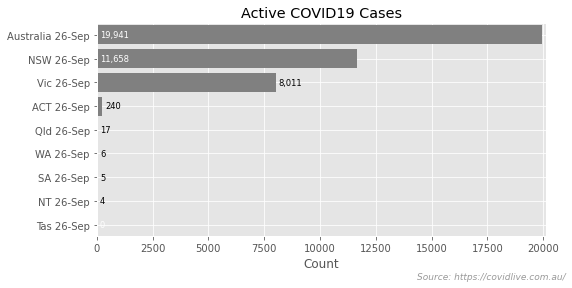

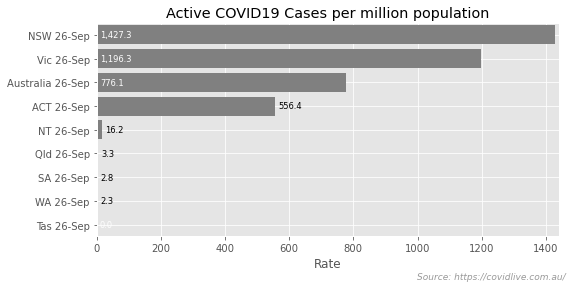

In [22]:
# bar chart of latest active cases, where data is complete
a_dict = {'active': active_all}
two_bar_plots(a_dict, 'active', 'Active', 'Cases')

### Active cases - line plots

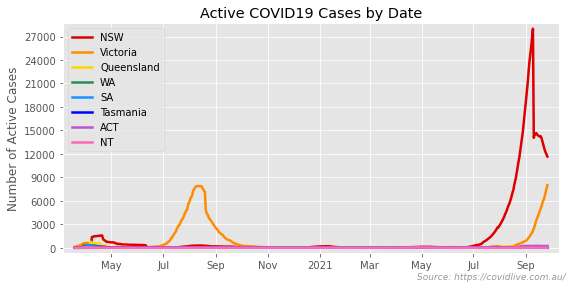

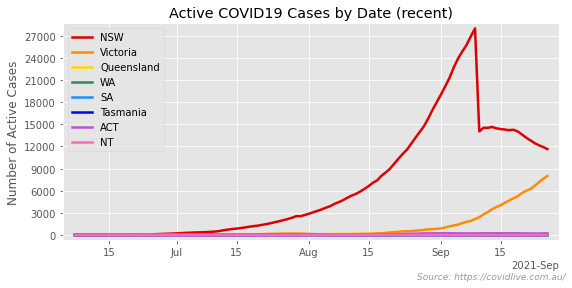

In [23]:
# line plots of trajectories
if 'Australia' in active_all.columns:
    del active_all['Australia']
    
line_plots(active_all, 'Active COVID19 Cases by Date',
           'Number of Active Cases')

### A look at Active Case Counts - anticiptaed vs actual

In [24]:
def active_case_anomaly(state):
    START = '2021-06-01'
    STOP = '2021-11-11'

    p_map = {
        'NSW': 10,
        'Queensland': 14,
        'Victoria': 13,
        'ACT': 13,
    }
    
    active = _get_data_direct('ACTIVE_CNT', state, START, STOP)
    rolling_new_sum = _get_data('CASE_CNT', state, START, STOP).rolling(p_map[state]).sum()
    hospitalised = _get_data_direct('MED_HOSP_CNT', state, START, STOP)
    active_proxy = rolling_new_sum #+ hospitalised
    
    if False:
        # reporting on the tail of these comparisons
        print('=' * 50)
        print(state)
        print('Reported active')
        display(active.tail(3))
        print('Proxy active')
        display(active_proxy.tail(3))
    
    fig, ax = plt.subplots()
    ax.plot(active.index, active, lw=2.5, c='darkred', label=f'{state} Reported Active Cases')
    ax.plot(active_proxy.index, active_proxy, lw=2.5, c='dodgerblue', 
        label=f'{state} {p_map[state]}-day rolling sum new cases') # + hospitalised cases')
    ax.legend(loc='upper left', prop={'size': 9})
    ps.finalise_plot(ax, 
                 title=f'Active cases {state} vs {p_map[state]}-day rolling sum', #'plus hospitalised', 
                 xlabel=None, 
                 ylabel='Count',
                 **std_plot_settings,
                )

Lastest value less than its predecessor in ACTIVE_CNT for NSW, Queensland
Lastest value less than its predecessor in MED_HOSP_CNT for Australia, NSW


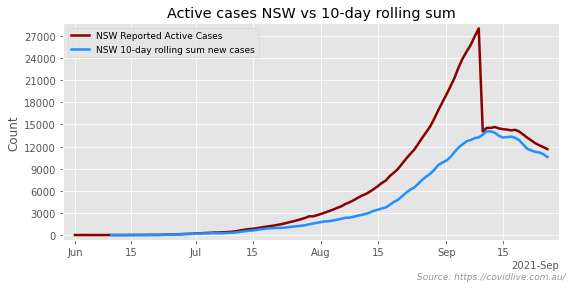

Lastest value less than its predecessor in ACTIVE_CNT for NSW, Queensland
Lastest value less than its predecessor in MED_HOSP_CNT for Australia, NSW


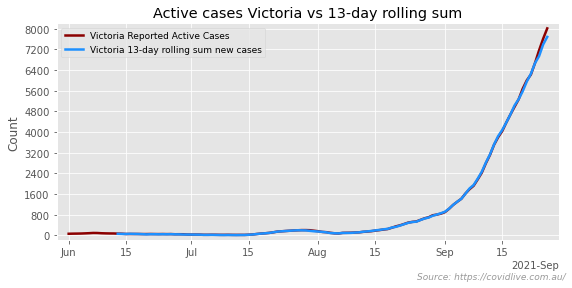

Lastest value less than its predecessor in ACTIVE_CNT for NSW, Queensland
Lastest value less than its predecessor in MED_HOSP_CNT for Australia, NSW


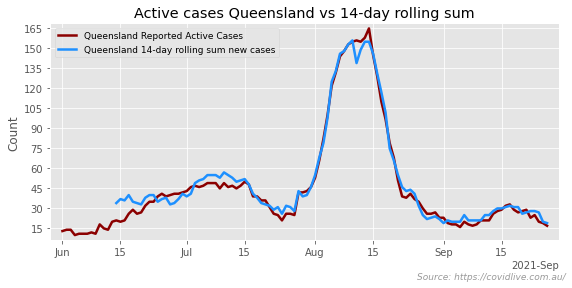

Lastest value less than its predecessor in ACTIVE_CNT for NSW, Queensland
Lastest value less than its predecessor in MED_HOSP_CNT for Australia, NSW


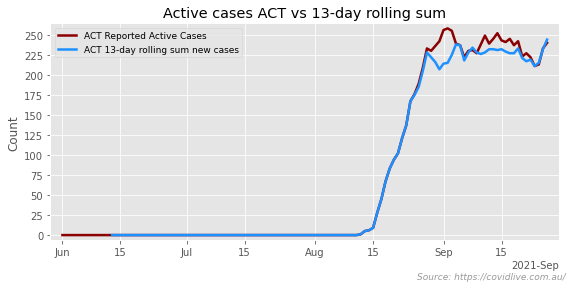

In [25]:
if True:
    for state in ('NSW', 'Victoria', 'Queensland', 'ACT'):
        active_case_anomaly(state)

## Explore cases to deaths

### Establish periods

In [26]:
vic_wave_2_deaths = {
        'Victoria Second Wave 2020': ('Victoria', '2020-06-09', '2020-11-01'),
}

current_dealths = {
        'NSW June 2021 (Delta)': ('NSW', '2021-06-16', '2021-12-01'),
        'Vic August 2021 (Delta)': ('Victoria', '2021-08-04', '2021-12-01'),
}

combined_deaths = {**vic_wave_2_deaths, **current_dealths}

### supporting functions

In [27]:
def get_daily_cases_deaths(state, start, stop):
    cases = _get_data('CASE_CNT', state, start, stop)
    deaths = _get_data('DEATH_CNT', state, start, stop)
    return cases, deaths

In [28]:
CD_SMOOTHING = 7 

def cd_comparison_plot(raw_cases, raw_deaths, 
                       name, d_shift, rolling=CD_SMOOTHING):
    
    # calculate factor adjusting for the left shift in deaths
    total_cases = raw_cases.iloc[:-d_shift].sum() if d_shift else raw_cases.sum()
    total_deaths = raw_deaths.sum()
    factor = total_cases / total_deaths
    print(f'Factor: {factor}; inverse: {1.0/factor}')

    # prepare for plotting
    cases = raw_cases.rolling(rolling).mean()
    deaths = factor * raw_deaths.rolling(rolling).mean().shift(-d_shift)

    suffix = f'{rolling}-day MA'
    deaths_label = f'Deaths * {factor:0.2f} {suffix}'
    if d_shift:
        deaths_label += f'; left-shift: {-d_shift} days'

    # plotting
    fig, ax = plt.subplots()
    data = (
        pd.DataFrame([cases, deaths], index=[f'Cases {suffix}', deaths_label])
        .dropna(axis=1, how='all')
        .T
    )
    for col in data.columns:
        series = data[col]
        ax.plot(series.index, series, lw=2.5, label=col)

    title = name + f' - {rolling}-day Moving Ave'
    if d_shift:
        title += '; deaths left shifted'
        ax.figure.text(x=0.01, y=0.99, 
                       s=f'{total_deaths:,.0f} deaths for {total_cases:,.0f} '
                       f'cases (of {raw_cases.sum():,.0f})',
                       ha='left', va='top',
                       fontsize=8, fontstyle='italic',
                       color='#999999')
        
    multiplier = 100
    ax.legend(loc='best')
    ps.finalise_plot(ax, 
                     title=title, 
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     lfooter=f'Cumulative {1/factor*multiplier:0.2f} deaths per {multiplier:,} cases.'
                             f' Cases excluding final {d_shift} days.' if d_shift else '',
                     **std_plot_settings,
                    )


In [29]:
def get_best_left_shift(raw_cases, raw_deaths, smooth=CD_SMOOTHING):

    # calculate cases to deaths factor 
    # inflate deaths to achieve parity
    deaths = raw_deaths.copy()
    factor = raw_cases.sum() / raw_deaths.sum()
    deaths = deaths * factor
    
    # smooth both series (because they are so noisy)
    cases = raw_cases.rolling(smooth, center=True, min_periods=1).mean()
    deaths = deaths.rolling(smooth, center=True, min_periods=1).mean()
   
    # test a range of possible options and find the best (minimum)
    max_difference = np.inf
    best = None
    results = {}
    for deviation in range(0, 30):
        abs_difference = (cases - deaths.shift(-deviation))
        abs_difference = abs_difference.abs().sum() 
        abs_difference += deaths.iloc[:deviation].sum(skipna=True) # correct for left shift loss
        results[deviation] = abs_difference
        if abs_difference < max_difference:
            max_difference = abs_difference
            best = deviation
            
    #print(results)
    return best

### Daily deaths in period

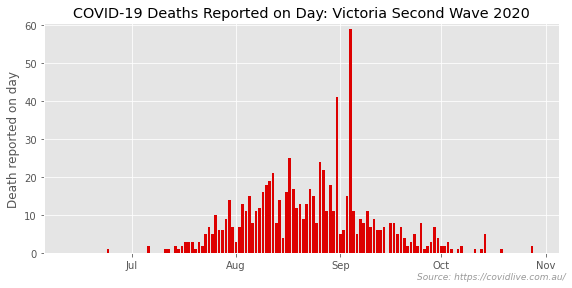

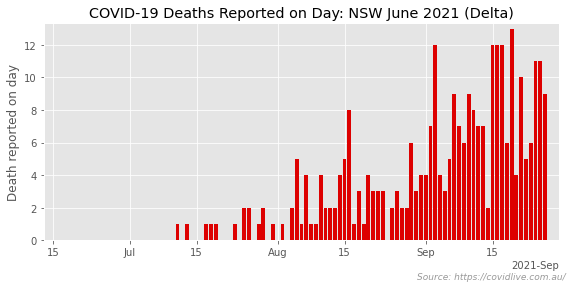

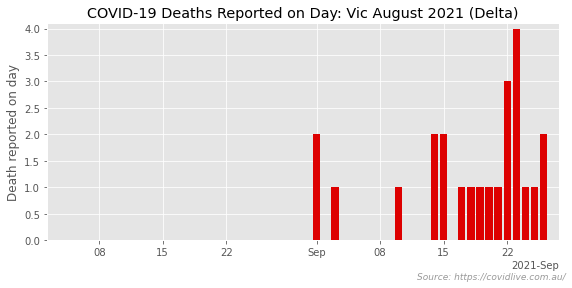

In [30]:
def plot_daily_deaths(plot_frame):
    for name, (state, start, stop) in plot_frame.items():
        cases, deaths = get_daily_cases_deaths(state, start, stop)
        fig, ax = plt.subplots()
        ax.bar(deaths.index, deaths)

        ps.finalise_plot(ax, 
                         no_locator=True,
                         title=f'COVID-19 Deaths Reported on Day: {name}', 
                         xlabel=None,
                         ylabel='Death reported on day',
                         **std_plot_settings,
                        )

plot_daily_deaths(combined_deaths)

### Establish historical baseline

Factor: 23.3225; inverse: 0.042877050058955944


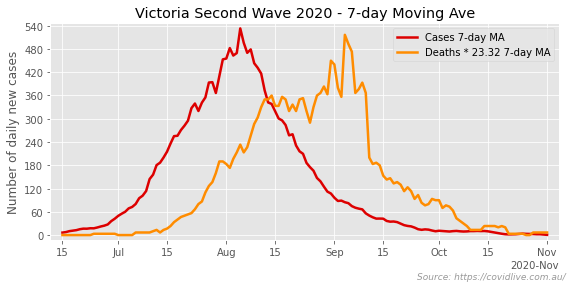

Factor: 23.2425; inverse: 0.04302463160159191


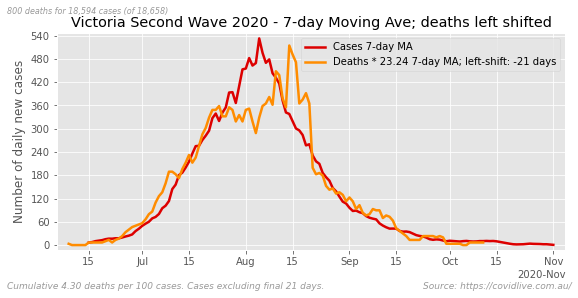

'Best lag for deaths: 21 days'

In [31]:
for name, (state, start, stop) in vic_wave_2_deaths.items():
    cases, deaths = get_daily_cases_deaths(state, start, stop)
    cd_comparison_plot(cases, deaths, name, 0)
    best_shift = get_best_left_shift(cases, deaths)
    cd_comparison_plot(cases, deaths, name, best_shift)
    break # This look should only be done once
    
f'Best lag for deaths: {best_shift} days'

### Use above baseline to look at the recent Sydney Delta outbreak

Factor: 94.8114478114478; inverse: 0.010547249547214034


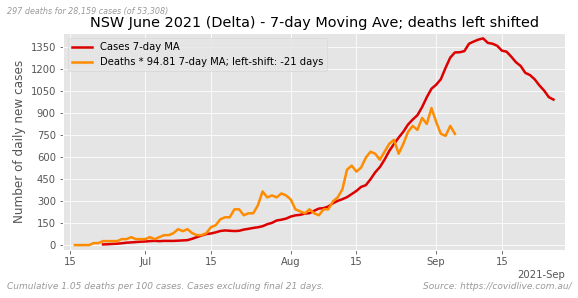

Factor: 82.79166666666667; inverse: 0.012078510317060896


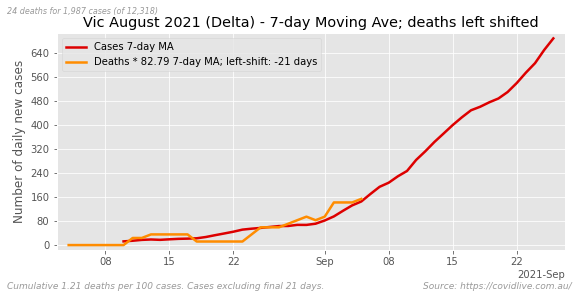

In [32]:
for name, (state, start, stop) in current_dealths.items():
    cases, deaths = get_daily_cases_deaths(state, start, stop)
    cd_comparison_plot(cases, deaths, name, best_shift)

### Running cumulative death rates for outbreaks

In [33]:
def plot_cum_death_rate(raw_cases, raw_deaths, 
                        name, d_shift, 
                        rolling=CD_SMOOTHING, 
                        ignore_first=7):
    
    # compute
    deaths = raw_deaths.fillna(0).cumsum()
    if deaths.iloc[-1] == 0:
        return None # ignore no cumulative cases ...
    
    cases = raw_cases.fillna(0).shift(d_shift).cumsum()
    cases = cases[cases > 0] # ignore leading zeros in case numbers
    running_rate = ((deaths / cases) * 100).dropna() 
    running_rate = running_rate[running_rate.index[ignore_first:]]
    
    # plot
    title = f'Cum. Deaths per 100 diagnosed cases: {name}'
    if d_shift:
        lfooter = ('Cumulative deaths on date compared with '
                  f'cumulative cases {d_shift} days previous')
    
    fig, ax = plt.subplots()
    ax.plot(running_rate.index, running_rate, lw=2.5)
    ps.finalise_plot(ax, 
                     title=title, 
                     xlabel=None,
                     ylabel='Death rate (per 100 cases)',
                     lfooter=lfooter,
                     **std_plot_settings,
                    )
    
    return running_rate

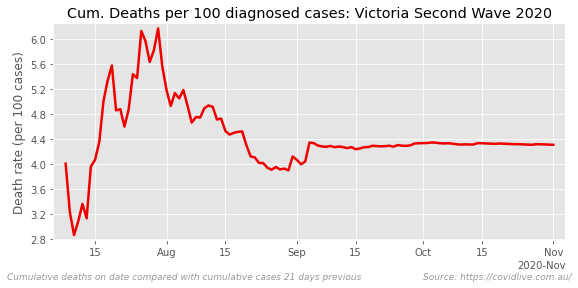

Rate at end series: 4.302463160159191


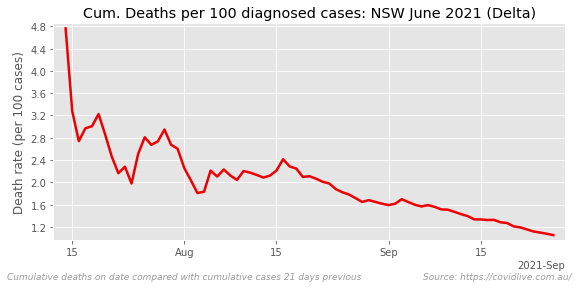

Rate at end series: 1.0547249547214035


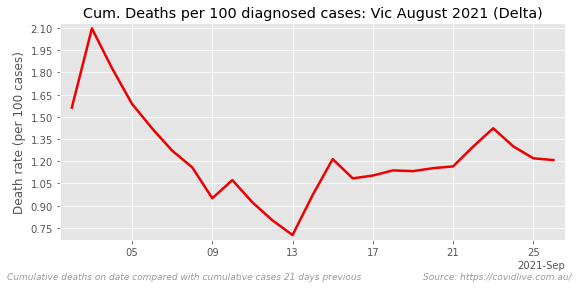

Rate at end series: 1.2078510317060895


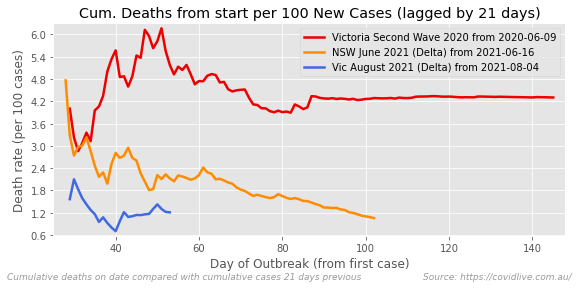

In [34]:
def plot_cumulative_death_rates(shift:int):
    colours = ['#ee0000', 'darkorange', 'royalblue', '#555555']
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colours)
    
    examine = combined_deaths
    
    comparator = {}
    all_deaths = {}
    for name, (state, start, stop) in examine.items():
        key = f'{name} from {start}'
        cases, deaths = get_daily_cases_deaths(state, start, stop)
        all_deaths[key] = deaths.cumsum().reset_index(drop=True)
        series = plot_cum_death_rate(cases, deaths, name, shift)
        print('Rate at end series:', series.iloc[-1])
        if series is None: 
            continue
        date_displacement = (series.index[0] - cases.index[0]) / pd.Timedelta(days=1)
        series = series.reset_index(drop=True)
        series.index += date_displacement
        comparator[key] = series
        
    comparator = pd.DataFrame(comparator)
    fig, ax = plt.subplots()
    comparator.plot(ax=ax, lw=2.5)
    ps.finalise_plot(ax, 
                 title=f'Cum. Deaths from start per 100 New Cases (lagged by {shift} days)', 
                 xlabel='Day of Outbreak (from first case)',
                 ylabel='Death rate (per 100 cases)',
                 lfooter=f'Cumulative deaths on date compared with cumulative cases {shift} days previous',
                 **std_plot_settings,
                )
    
    return all_deaths

# best_shift identified from Melbourne second wave above
all_deaths = plot_cumulative_death_rates(best_shift)

### Cumulative deaths for outbreaks

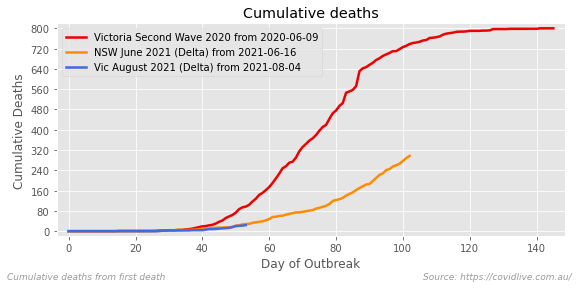

In [35]:
all_deaths = pd.DataFrame(all_deaths)
fig, ax = plt.subplots()
all_deaths.plot(ax=ax, lw=2.5)
ps.finalise_plot(ax, 
                 title=f'Cumulative deaths', 
                 xlabel='Day of Outbreak',
                 ylabel='Cumulative Deaths',
                 lfooter=f'Cumulative deaths from first death',
                 **std_plot_settings,
                )


### Rolling death rates for outbreaks

In [36]:
def annotate_end(series, ax):
    ax.axvline(x=series.index[-1], lw=0.75, c='#999999')
    ylim = ax.get_ylim()
    yadj = (ylim[1] - ylim[0]) * 0.025
    xlim = ax.get_xlim()
    xadj = (xlim[1] - xlim[0]) * 0.005
    
    ax.text(series.index[-1]+pd.Timedelta(days=xadj), ylim[0] + yadj, 
            f'{series.iloc[-1]:,.2f}', rotation=90, ha='left', va='bottom')

In [37]:
def rolling_death_rates(shift):
    colours = ['#ee0000', 'darkorange', 'royalblue', '#555555']
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colours)
    
    PERIOD = 14 # day window
    
    examine = combined_deaths
    
    combined = {}
    
    lfooter = (
        f'All deaths in rolling window (length={PERIOD} days) / '
        f'cases in window from {best_shift} days previous'
    )
    title = 'Rolling Deaths per 100 New Cases'
    ylabel  = 'Death rate per 100 cases'
    
    for name, (state, start, stop) in examine.items():
        cases, deaths = get_daily_cases_deaths(state, start, stop)
        
        if deaths.sum() == 0:
            continue # no deaths yet
        
        cases_ = cases.shift(best_shift).rolling(PERIOD, min_periods=PERIOD).sum()
        deaths_ = deaths.rolling(PERIOD, min_periods=PERIOD).sum()
        rolling_rate = (deaths_ / cases_ * 100)
        fig, ax = plt.subplots()
        ax.plot(rolling_rate.index, rolling_rate, lw=2.5)
        annotate_end(rolling_rate, ax)
        ps.finalise_plot(ax, 
                         title=f'{title} {name}', 
                         xlabel=None,
                         ylabel=ylabel,
                         lfooter=lfooter,
                         **std_plot_settings,
                        )
        # callibrate index in days from start
        displacement = (rolling_rate.index[0] - cases.index[0]) / pd.Timedelta(days=1)
        rolling_rate = rolling_rate.reset_index(drop=True)
        rolling_rate.index += displacement
        combined[f'{name} from {start}'] = rolling_rate
        
    # combined plot
    combined = pd.DataFrame(combined)
    fig, ax = plt.subplots()
    combined.plot(lw=2.5, ax=ax)
    ps.finalise_plot(ax, 
                     title=title, 
                     xlabel='Day of Outbreak',
                     ylabel=ylabel,
                     lfooter=lfooter,
                     **std_plot_settings,
                    )

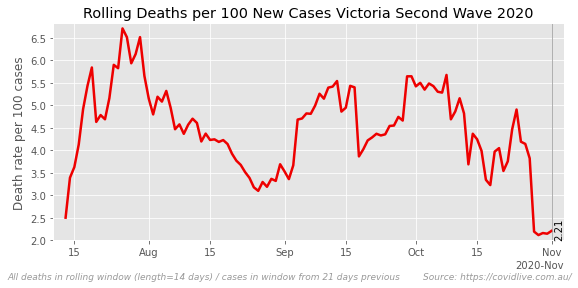

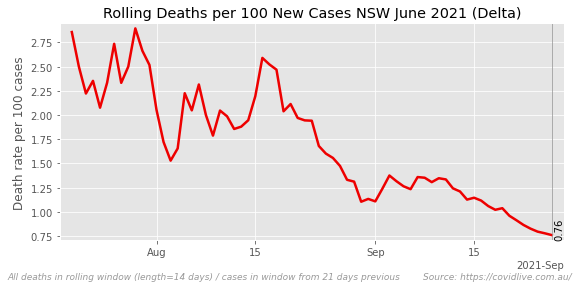

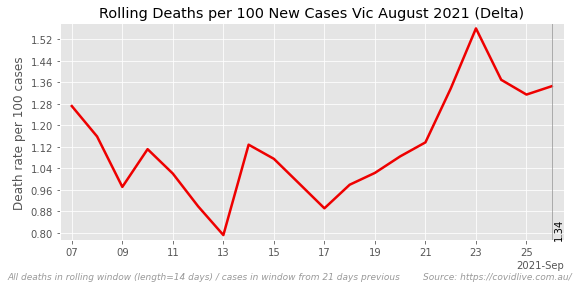

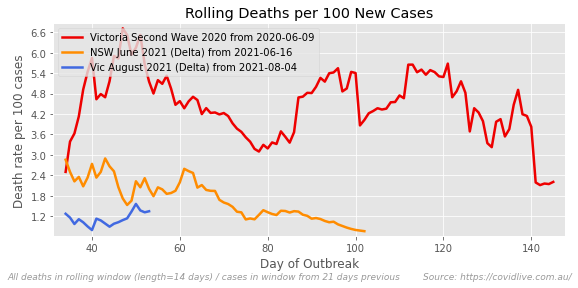

In [38]:
rolling_death_rates(best_shift)

## Vaccination plots

### Get data

In [39]:
items = ['VACC_DOSE_CNT', 'VACC_PEOPLE_CNT', 
'VACC_AGED_CARE_CNT', 'VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',]
vaxx_data = {}
for item in items:
    vaxx_data[item] = (
        get_item(item, raw_json_data)
        .pipe(lambda x: x.where(x.diff()!=0, other=np.nan))
        .interpolate(limit_area='inside')
    )

In [40]:
vaxx_data['VACC_DOSE_RESIDENCE_CNT'] = (
    vaxx_data['VACC_PEOPLE_CNT'] 
    + vaxx_data['VACC_FIRST_DOSE_CNT']
)

In [41]:
vaxx_data['VACC_DOSE_CNT'].tail(5)

NAME              ACT   Australia        NSW        NT  Queensland         SA  \
REPORT_DATE                                                                     
2021-09-22   612275.0  25445232.0  9186871.0  255838.0   4408016.0  1578880.0   
2021-09-23   620191.0  25782517.0  9312486.0  258282.0   4461548.0  1597484.0   
2021-09-24   628964.0  26130313.0  9439214.0  260746.0   4519251.0  1615405.0   
2021-09-25   637335.0  26441588.0  9579725.0  263432.0   4570657.0  1632535.0   
2021-09-26   645227.0  26660961.0  9665303.0  264334.0   4605622.0  1643908.0   

NAME         Tasmania   Victoria         WA  
REPORT_DATE                                  
2021-09-22   556546.0  6614096.0  2232710.0  
2021-09-23   563831.0  6710394.0  2258301.0  
2021-09-24   569583.0  6812272.0  2284878.0  
2021-09-25   574758.0  6873002.0  2310144.0  
2021-09-26   579355.0  6932693.0  2324519.0

In [42]:
vaxx_data['VACC_DOSE_RESIDENCE_CNT'].tail(5)

NAME              ACT   Australia        NSW        NT  Queensland         SA  \
REPORT_DATE                                                                     
2021-09-22   488598.0  25396636.0  9243464.0  217722.0   4326090.0  1578411.0   
2021-09-23   494971.0  25733071.0  9370254.0  219963.0   4378226.0  1596902.0   
2021-09-24   502023.0  26080012.0  9498341.0  222179.0   4434520.0  1614824.0   
2021-09-25   508959.0  26390465.0  9638412.0  224650.0   4484826.0  1631828.0   
2021-09-26   515556.0  26609171.0  9724760.0  225571.0   4519158.0  1643250.0   

NAME         Tasmania   Victoria         WA  
REPORT_DATE                                  
2021-09-22   556779.0  6542497.0  2210029.0  
2021-09-23   564007.0  6635451.0  2235152.0  
2021-09-24   569853.0  6734783.0  2261164.0  
2021-09-25   575082.0  6794267.0  2285978.0  
2021-09-26   579698.0  6852633.0  2300273.0

### Data checking

In [43]:
# check total doses =  VACC_PEOPLE_CNT + VACC_FIRST_DOSE_CNT
vaxx_data['VACC_DOSE_CNT'].iloc[-1]

NAME
ACT             645227.0
Australia     26660961.0
NSW            9665303.0
NT              264334.0
Queensland     4605622.0
SA             1643908.0
Tasmania        579355.0
Victoria       6932693.0
WA             2324519.0
Name: 2021-09-26 00:00:00, dtype: float64

In [44]:
vaxx_data['VACC_DOSE_CNT'].iloc[-1] - vaxx_data['VACC_DOSE_RESIDENCE_CNT'].iloc[-1]

NAME
ACT           129671.0
Australia      51790.0
NSW           -59457.0
NT             38763.0
Queensland     86464.0
SA               658.0
Tasmania        -343.0
Victoria       80060.0
WA             24246.0
Name: 2021-09-26 00:00:00, dtype: float64

In [45]:
lf_residence = {'lfooter': 'State based on the residence of the recipient',}
lf_provider = {'lfooter': 'State based on the location of the provider', }

### Bar plots

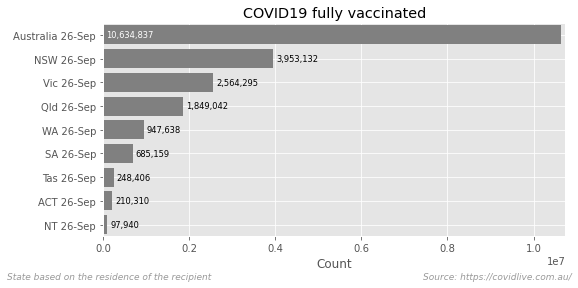

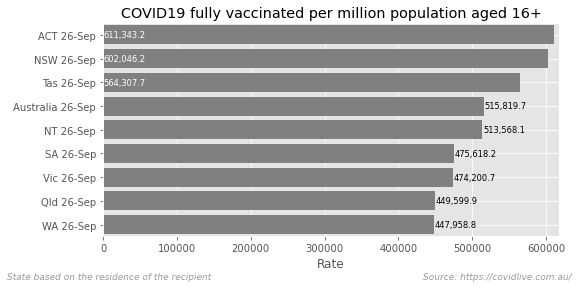

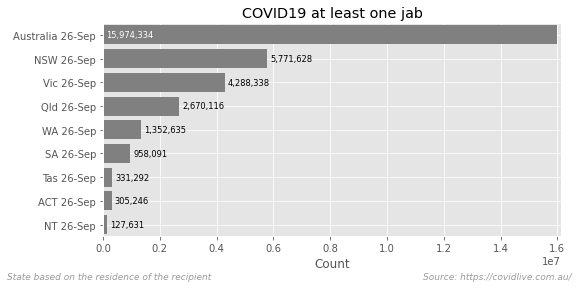

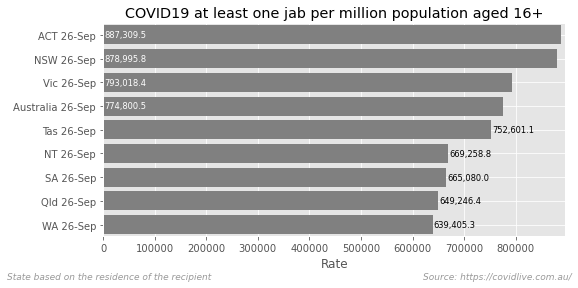

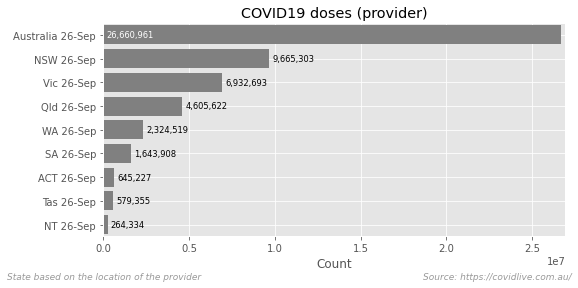

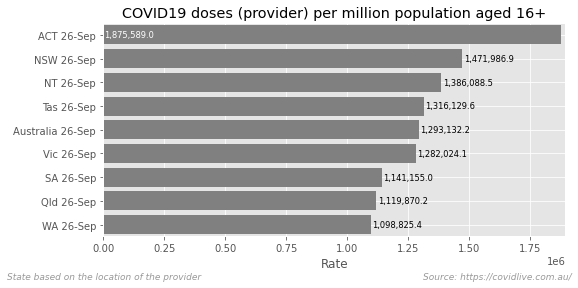

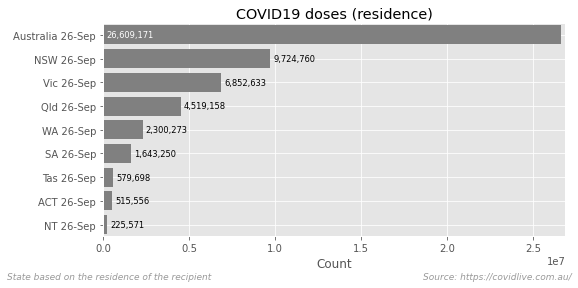

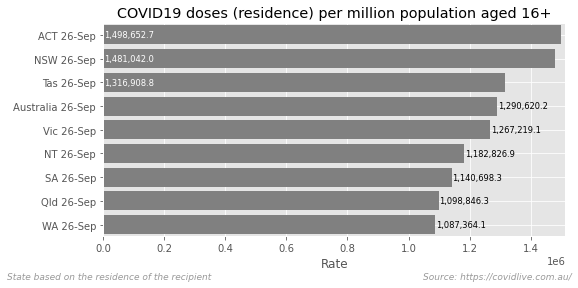

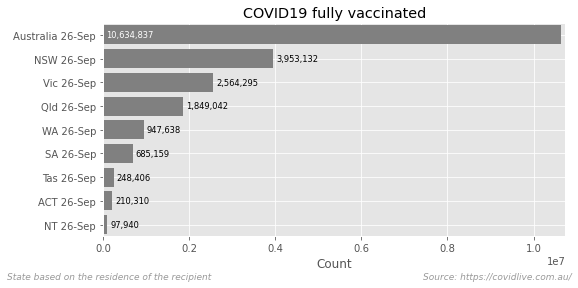

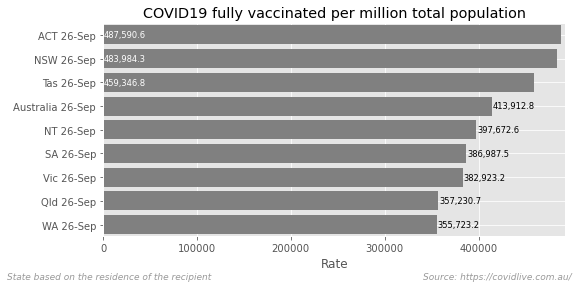

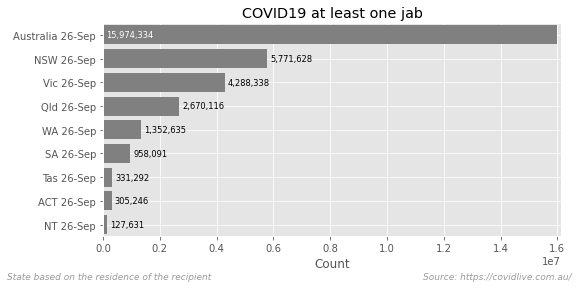

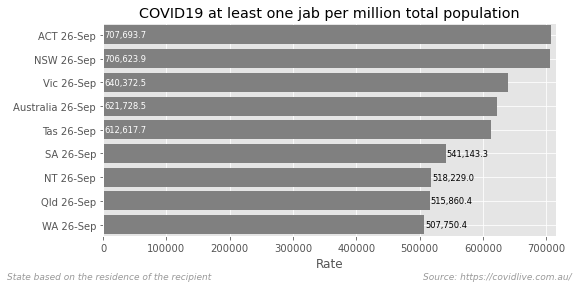

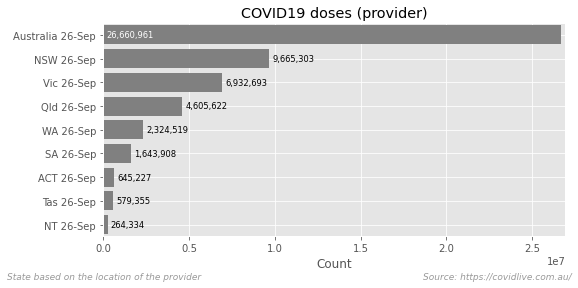

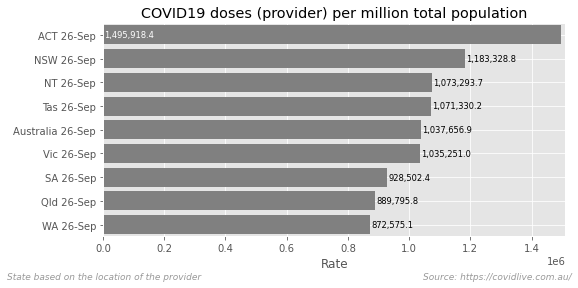

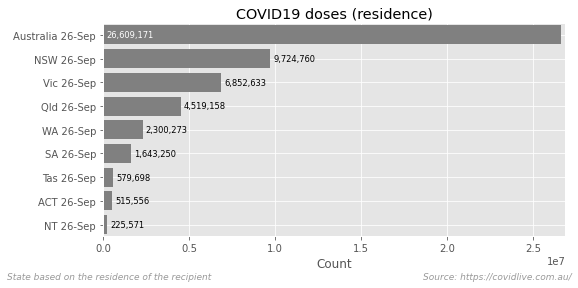

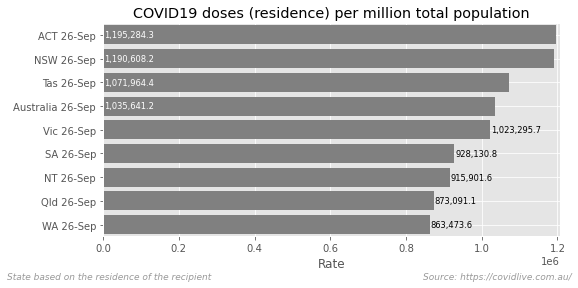

In [46]:
kwargs_16 = {'pop_series': eligible_pop, 'pop_label': 'population aged 16+'}
kwargs_all = {'pop_series': state_pop, 'pop_label': 'total population'}
for kwargs in kwargs_16, kwargs_all:
    two_bar_plots(vaxx_data, 'VACC_PEOPLE_CNT', '', 'fully vaccinated', 
                  **kwargs, **lf_residence)
    two_bar_plots(vaxx_data, 'VACC_FIRST_DOSE_CNT', '', 'at least one jab', 
                  **kwargs, **lf_residence)
    two_bar_plots(vaxx_data, 'VACC_DOSE_CNT', '', 'doses (provider)', 
                  **kwargs, **lf_provider)
    two_bar_plots(vaxx_data, 'VACC_DOSE_RESIDENCE_CNT', '', 'doses (residence)', 
                  **kwargs, **lf_residence)

### Timeline plots - first doses

In [47]:
state_pop

NSW            8.167893
Victoria       6.696630
Queensland     5.176044
SA             1.770494
WA             2.663976
Tasmania       0.540781
NT             0.246283
ACT            0.431325
Australia     25.693426
dtype: float64

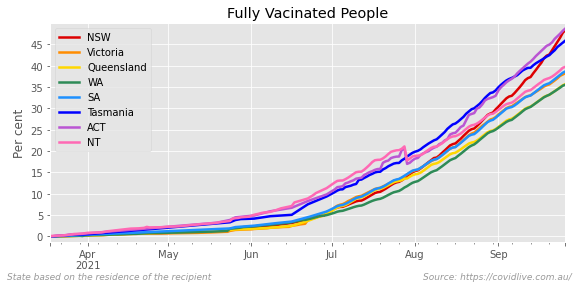

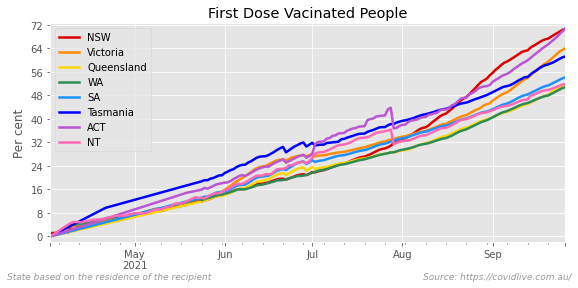

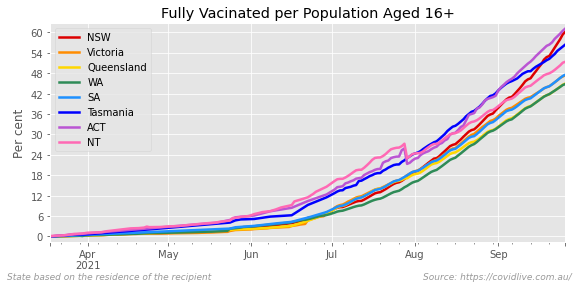

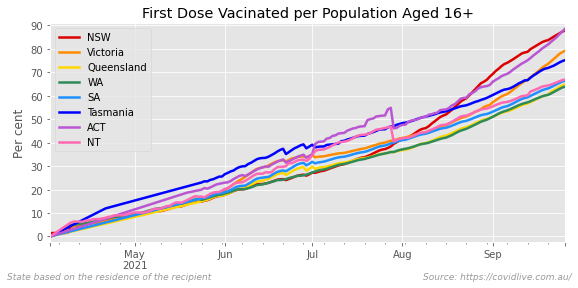

In [48]:
def vaxx_line_plot(item, title, population, **kwargs, ):
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
    per_capita = pd.DataFrame()
    frame = vaxx_data[item]
    for col in frame.columns:
        per_capita[col] = frame[col] / (population[col] * 1_000_000) * 100
    per_capita = per_capita[state_order]
    ax = per_capita.plot(lw=2.5)
    ps.finalise_plot(ax, 
                     title=title, 
                     xlabel=None,
                     ylabel='Per cent',
                     **std_plot_settings,
                     **kwargs,
                    )
    
vaxx_line_plot('VACC_PEOPLE_CNT', 'Fully Vacinated People', 
               state_pop, **lf_residence)
vaxx_line_plot('VACC_FIRST_DOSE_CNT', 'First Dose Vacinated People', 
               state_pop, **lf_residence)
vaxx_line_plot('VACC_PEOPLE_CNT', 'Fully Vacinated per Population Aged 16+', 
               eligible_pop, **lf_residence)
vaxx_line_plot('VACC_FIRST_DOSE_CNT', 'First Dose Vacinated per Population Aged 16+', 
               eligible_pop, **lf_residence)


## Hospitalised

### Hospitalised Bar Charts

In [49]:
# set-up
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)

In [50]:
# get data
idents = ['MED_HOSP_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT']
descs = ['Hospitalised', 'ICU', 'Ventilator']
hospital = {}
for ident, desc in zip(idents, descs):
    data = get_pivot_table(raw_json_data, ident)
    data.index = pd.DatetimeIndex(data.index)
    data = data.dropna(axis=0, how='all')
    hospital[ident] = data

Lastest value less than its predecessor in MED_HOSP_CNT for Australia, NSW
Lastest value less than its predecessor in MED_ICU_CNT for NSW
Lastest value less than its predecessor in MED_VENT_CNT for NSW


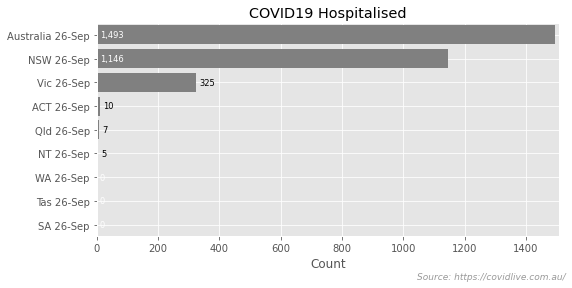

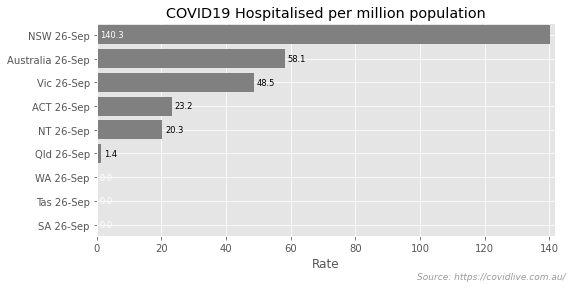

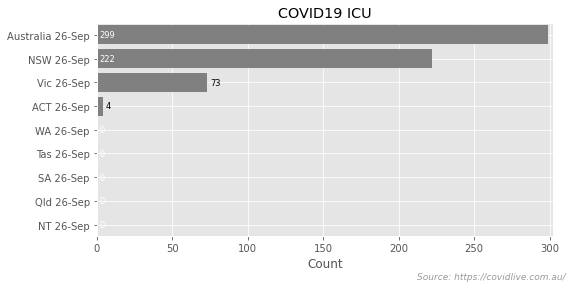

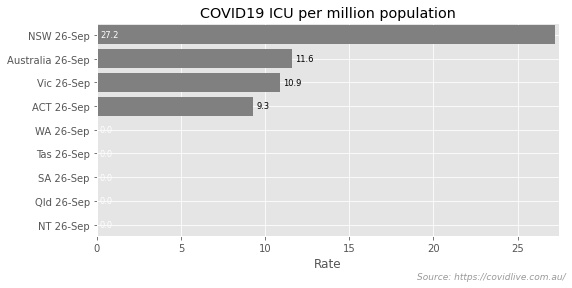

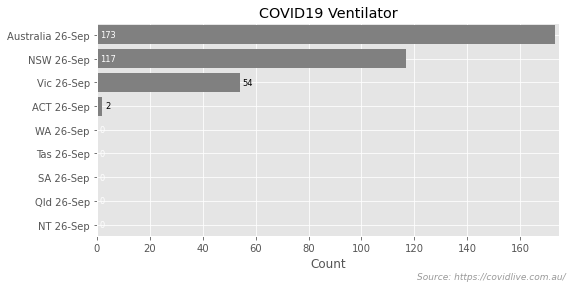

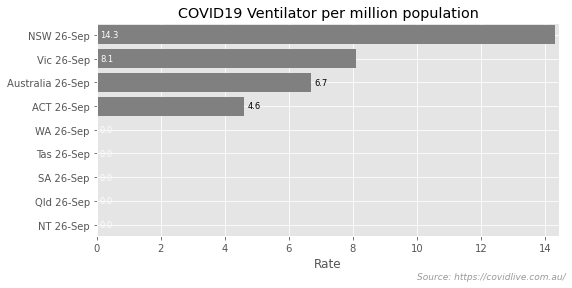

In [51]:
# bar charts
for item, desc in zip(idents, descs):
    two_bar_plots(hospital, item, '', desc)

### Hospitalised line plots

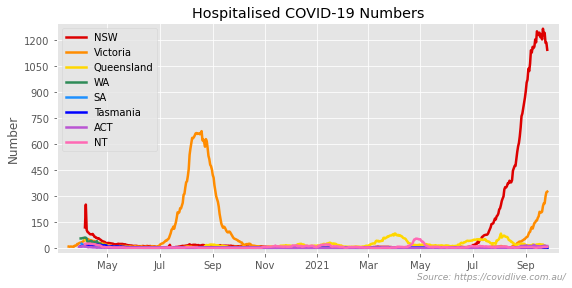

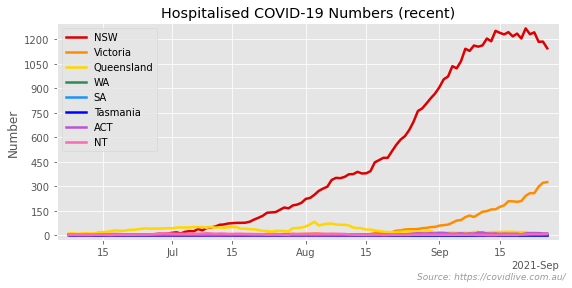

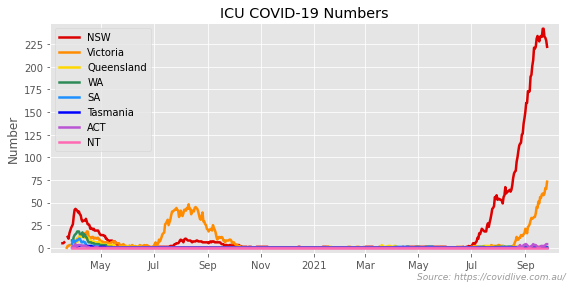

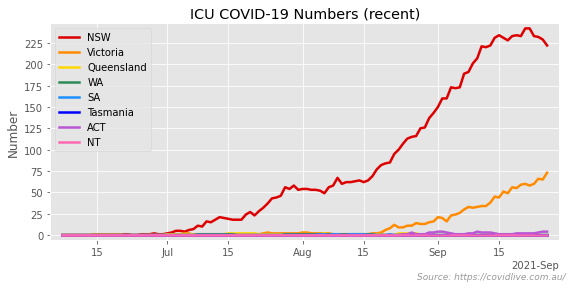

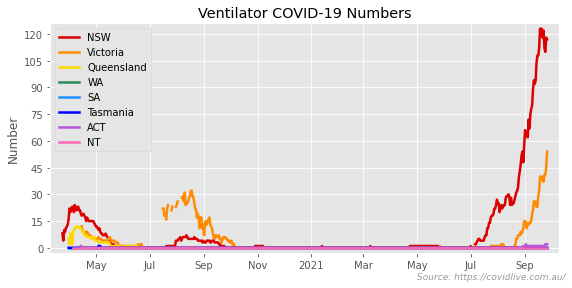

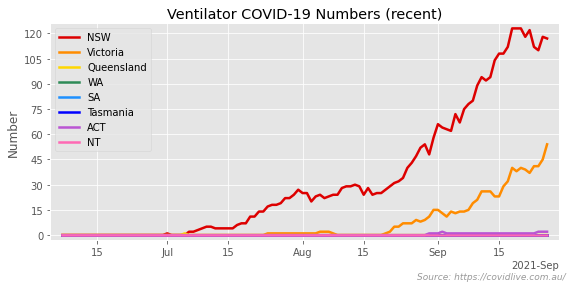

In [52]:
# line charts
for item, desc in zip(idents, descs):
    data = hospital[item]
    line_plots(data, f'{desc} COVID-19 Numbers', 'Number')

### Hospitalised as a proportion of active cases
Highly speculative - also problematic because of different hospital access arrangements in states. It would be much better if we had hospital admissins and discharges.

In [53]:
combined_deaths

{'Victoria Second Wave 2020': ('Victoria', '2020-06-09', '2020-11-01'),
 'NSW June 2021 (Delta)': ('NSW', '2021-06-16', '2021-12-01'),
 'Vic August 2021 (Delta)': ('Victoria', '2021-08-04', '2021-12-01')}

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


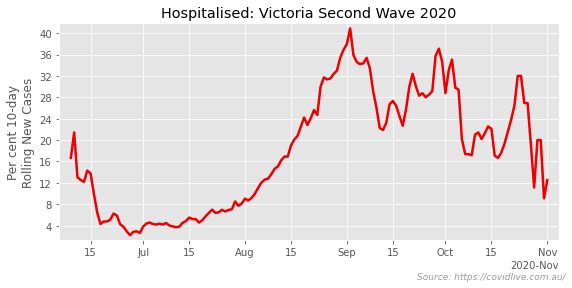

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


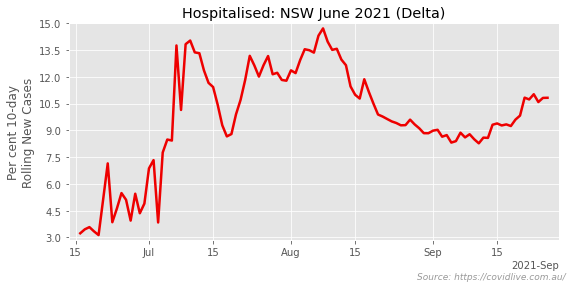

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


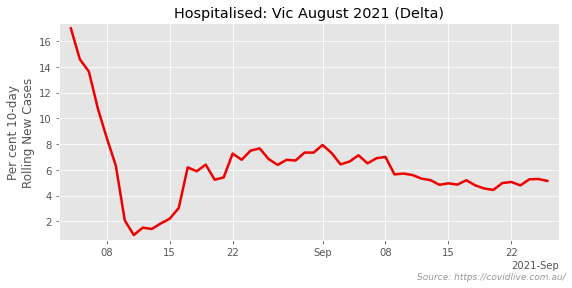

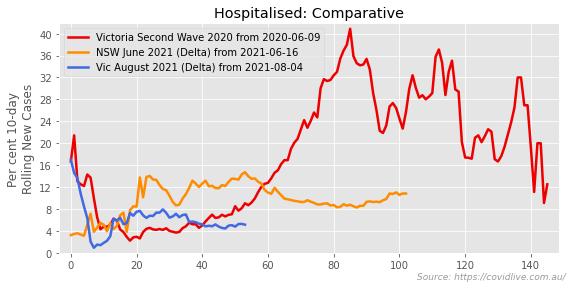

In [54]:
def plot_hospitalised_proportion(frame):
    ACTIVE_WINDOW = 10 # an arbitrary number based on NSW at 17 September
    colours = ['#ee0000', 'darkorange', 'royalblue', '#555555']
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colours)
    
    def prune(series, start, stop):
        series = series[series.index >= pd.Timestamp(start)]
        series = series[series.index <= pd.Timestamp(stop)]
        return series
    
    comparative = {}
    for name, (state, start, stop) in frame.items():
        active = prune(daily_c['CASE_CNT'][state].rolling(ACTIVE_WINDOW).sum(), start, stop)
        hospitalised = prune(hospital['MED_HOSP_CNT'][state], start, stop)
        rate = hospitalised / active * 100
        first_valid = rate[rate.notnull()].index[0]
        print(type(first_valid))
        rate = rate.loc[first_valid:]
        comparative[f'{name} from {first_valid.date()}'] = rate.reset_index(drop=True)
        fig, ax = plt.subplots()
        ax.plot(rate.index, rate, lw=2.5)
        ps.finalise_plot(ax, 
                         title=f'Hospitalised: {name}', 
                         xlabel=None,
                         ylabel=f'Per cent {ACTIVE_WINDOW}-day\nRolling New Cases',
                         **std_plot_settings,
                        )
    
    fig, ax = plt.subplots()
    comparative = pd.DataFrame(comparative)
    for col in comparative.columns:
        ax.plot(comparative[col].index, comparative[col], lw=2.5, label=col)
    ax.legend(loc='best')
    ps.finalise_plot(ax, 
                         title=f'Hospitalised: Comparative', 
                         xlabel=None,
                         ylabel=f'Per cent {ACTIVE_WINDOW}-day\nRolling New Cases',
                         **std_plot_settings,
                        )

plot_hospitalised_proportion(combined_deaths)

## Source of infection

### Extraction

In [55]:
Australia = 'Australia'
soi_names = {
    'SRC_OVERSEAS_CNT':   'Overseas',
    'SRC_INTERSTATE_CNT': 'Interstate',
    'SRC_CONTACT_CNT':    'Known contact',
    'SRC_UNKNOWN_CNT':    'Unknown contact',
    'SRC_INVES_CNT':      'Investigating',
}
# check we have all possible sources ...
assert((raw_json_data.columns.str[:3] == 'SRC').sum() == len(soi_names))

soi_colours = ['dodgerblue', '#aaaaaa', '#555555', '#dd0000', 'darkorange',]
assert(len(soi_colours) == len(soi_names)) # check we have the right number of colours

In [56]:
def extract_soi(raw_json_data):

    # construct data for sources of infection
    soi_tables = {}
    for item in soi_names.keys():
        table = get_item(item, raw_json_data)
        if Australia in table.columns: del table[Australia]
        soi_tables[soi_names[item]] = table

    state_soi_tables = {}
    for state in state_pop.keys():
        if state == Australia: continue
        table = pd.DataFrame()
        for item in soi_names.keys():
            table[soi_names[item]] = soi_tables[soi_names[item]][state]
        state_soi_tables[state] = table.dropna()

    soi_national = {}
    for key in soi_tables.keys():
        soi_national[key] = soi_tables[key].sum(axis=1)
    soi_national = pd.DataFrame(soi_national) 
    if soi_national.iloc[-1].sum() < soi_national.iloc[-2].sum():
        # last cumulative row incomplete
        soi_national = soi_national[:-1]

    return soi_tables, state_soi_tables, soi_national

In [57]:
soi_tables, state_soi_tables, soi_national = extract_soi(raw_json_data)

### Check latest raw SOI data against raw case count data

In [58]:
# WARN if penultimate and final SOI 
# totals do not match CASE_CNT table

def check_SOI():
    FINALITY = 3
    
    soi_cases = {name: x.sum(axis=1) 
                     for name, x in state_soi_tables.items()}
    soi_cases = pd.DataFrame(soi_cases)
    cases = cum_u['CASE_CNT'][soi_cases.columns] # ensure column order

    for check in (-1, -2):
        case_row = cases.diff().iloc[check]
        soi_row = soi_cases.diff().iloc[check]
        problematic = (
            (case_row != soi_row) 
            & soi_row.notna() 
            & case_row.notna()
        )
        if problematic.any():
            warn(f'CASE_CNT mismatch - check the {"second " if check == -2 else ""}'
                 'last line of the SOI tables for '
                 f'{problematic[problematic].index.values}')
            
            print('Latest cases data:')
            display(cases.diff().tail(FINALITY))
            print('Latest source of infection data:')
            display(soi_cases.diff().tail(FINALITY))
            
            print('=' * 50)
            problematic = problematic[problematic]
            for i, p in problematic.iteritems():
                print(i)
                display(state_soi_tables[i].tail(FINALITY))
                print('-' * 50)

check_SOI()

CASE_CNT mismatch - check the last line of the SOI tables for ['Victoria']
Latest cases data:


NAME            NSW  Victoria  Queensland   SA   WA  Tasmania   NT   ACT
REPORT_DATE                                                             
2021-09-24   1026.0     718.0         0.0  0.0  1.0       0.0  0.0  19.0
2021-09-25    995.0     836.0         1.0  0.0  0.0       0.0  0.0  32.0
2021-09-26    948.0     758.0         0.0  1.0  0.0       0.0  0.0  25.0

Latest source of infection data:


NSW  Victoria  Queensland   SA   WA  Tasmania   NT   ACT
REPORT_DATE                                                             
2021-09-24   1026.0     718.0         0.0  0.0  1.0       0.0  0.0  19.0
2021-09-25    995.0     836.0         1.0  0.0  0.0       0.0  0.0  32.0
2021-09-26    948.0       0.0         0.0  1.0  0.0       0.0  0.0  25.0

Victoria


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2021-09-24     1224.0         0.0        21115.0           3866.0   
2021-09-25     1224.0         0.0        21310.0           3866.0   
2021-09-26     1224.0         0.0        21310.0           3866.0   

             Investigating  
REPORT_DATE                 
2021-09-24          5474.0  
2021-09-25          6115.0  
2021-09-26          6115.0

--------------------------------------------------


### Plot national SOI 

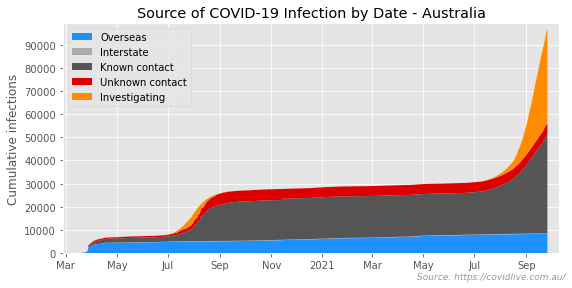

In [59]:
# plot time series of national totals
def plot_national_soi():

    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=soi_colours)

    labels = list(soi_names.values())
    args = [soi_national[name] for name in labels]
    fig, ax = plt.subplots()
    ax.stackplot(soi_national.index, *args, labels=labels)
    ax.legend(loc='upper left')

    title = 'Source of COVID-19 Infection by Date - Australia'
    ps.finalise_plot(ax, 
                 title=title, 
                 xlabel=None, 
                 ylabel='Cumulative infections',
                 **std_plot_settings,
                )
    
plot_national_soi()    

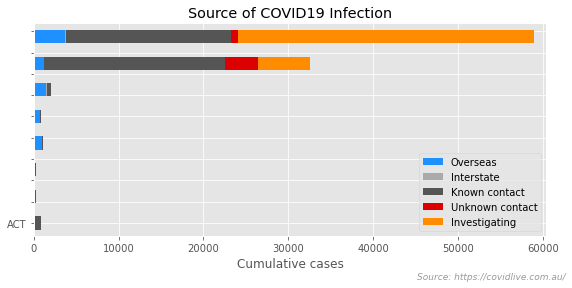

In [60]:
def plot_latest_soi():

    # extract the latest data, and under investigation
    latest = pd.DataFrame()

    for state in state_soi_tables.keys():
        latest[state] = state_soi_tables[state].iloc[-1]

    # plot the latest data
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=soi_colours)
    ax = latest.T[::-1].plot.barh(stacked=True)
    title = 'Source of COVID19 Infection'
    ps.finalise_plot(ax, 
                 title=title, 
                 xlabel='Cumulative cases', 
                 ylabel=None,
                 **std_plot_settings,
                )
    
plot_latest_soi()

### Plot cases under investigation by state

NAME          ACT      NSW   NT  Queensland   SA  Tasmania  Victoria   WA
REPORT_DATE                                                              
2021-09-22    8.0  32415.0  0.0         0.0  0.0       0.0    4310.0  0.0
2021-09-23   16.0  32977.0  0.0         0.0  0.0       0.0    4919.0  0.0
2021-09-24   14.0  33414.0  0.0         0.0  0.0       0.0    5474.0  0.0
2021-09-25   12.0  34122.0  0.0         0.0  0.0       0.0    6115.0  0.0
2021-09-26   12.0  34830.0  0.0         0.0  0.0       0.0    6115.0  0.0

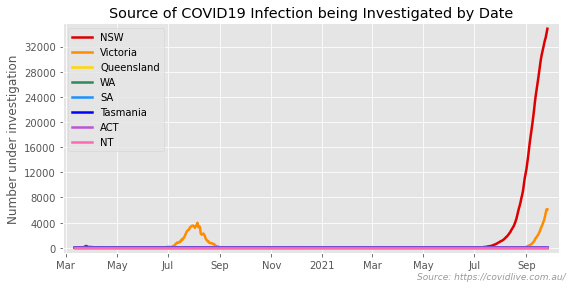

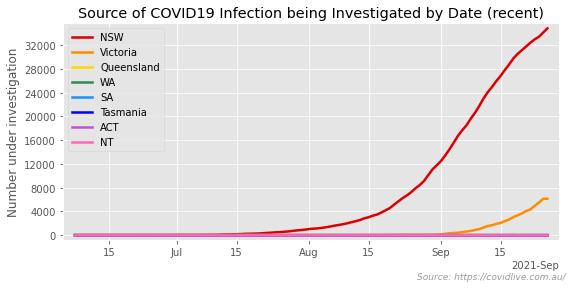

In [61]:
def plot_cases_under_investigation():
    under_investigation = soi_tables['Investigating']

    # These are running totals (and will go up and down)
    display(under_investigation.tail())

    line_plots(under_investigation, 
           'Source of COVID19 Infection being Investigated by Date',
           'Number under investigation',
          )
    
plot_cases_under_investigation()   

## Local cases/transmission

### Create dataframes for local transmission

In [62]:
LOCAL = 'LOCAL_TRANS'

def load_local_trans():
    local_trans = list(soi_names.values()) 
    local_trans.remove('Overseas')
    
    # raw cumulative local transmission
    local_trans_d = {}
    for state in state_soi_tables.keys():
        local_trans_d[state] = state_soi_tables[state][local_trans].sum(axis=1)
    local_trans_df = pd.DataFrame(local_trans_d).sort_index(ascending=True)

    # put local transmission into the same disctionaries
    # we used above, making the standard adjustments
    cum_u[LOCAL] = local_trans_df
    daily_u[LOCAL], daily_c[LOCAL], cum_c[LOCAL] = (
        ps.dataframe_correction(cum_u[LOCAL], verbose=False)
    )
    
load_local_trans()

In [63]:
# check the adjusted daily data
daily_c[LOCAL].iloc[-20:]

NSW  Victoria  Queensland   SA   WA  Tasmania   NT   ACT
REPORT_DATE                                                             
2021-09-07   1203.0     243.0         0.0  0.0  0.0       0.0  0.0  19.0
2021-09-08   1458.0     212.0         0.0  0.0  0.0       0.0  0.0  20.0
2021-09-09   1382.0     322.0         1.0  0.0  0.0       0.0  0.0  15.0
2021-09-10   1508.0     333.0         0.0  0.0  0.0       0.0  0.0  24.0
2021-09-11   1570.0     447.0         5.0  1.0  0.0       0.0  0.0  15.0
2021-09-12   1247.0     384.0         1.0  0.0  0.0       0.0  0.0  15.0
2021-09-13   1235.0     463.0         2.0  0.0  0.0       0.0  0.0  13.0
2021-09-14   1100.0     438.0         1.0  0.0  0.0       0.0  0.0  22.0
2021-09-15   1224.0     410.0         0.0  0.0  0.0       0.0  0.0  13.0
2021-09-16   1334.0     503.0         1.0  0.0  0.0       0.0  0.0  15.0
2021-09-17   1268.0     496.0         0.0  0.0  0.0       0.0  0.0  30.0
2021-09-18   1306.0     529.0         1.0  0.0  0.0       0.0  0.0  15.0
2021-09-19   1065.0     488.0         0.0  0.0  0.0       0.0  0.0  17.0
2021-09-20    907.0     552.0         1.0  0.0  0.0       0.0  1.0   7.0
2021-09-21   1003.0     589.0         0.0  0.0  0.0       0.0  0.0  16.0
2021-09-22   1021.0     620.0         1.0  0.0  0.0       0.0  0.0  17.0
2021-09-23   1043.0     745.0         1.0  0.0  0.0       0.0  0.0  16.0
2021-09-24   1025.0     718.0         0.0  0.0  1.0       0.0  0.0  19.0
2021-09-25    995.0     836.0         1.0  0.0  0.0       0.0  0.0  32.0
2021-09-26    945.0       0.0         0.0  0.0  0.0       0.0  0.0  25.0

### Bar charts cumulative local transmission

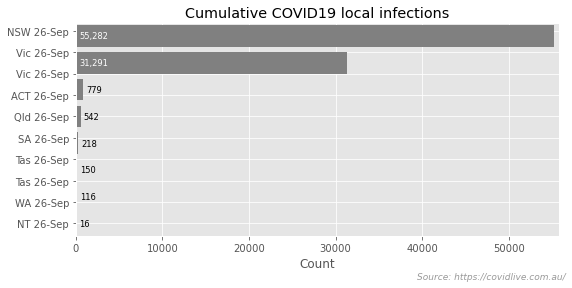

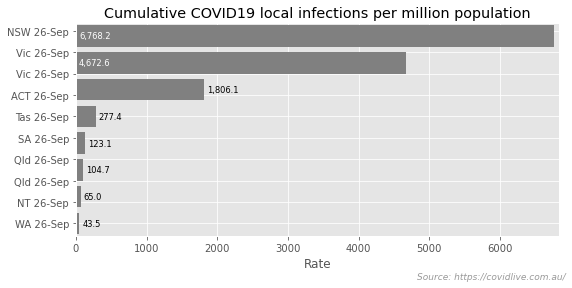

In [64]:
two_bar_plots(cum_u, LOCAL, 'Cumulative', 'local infections')

### Weekly charts for local transmission

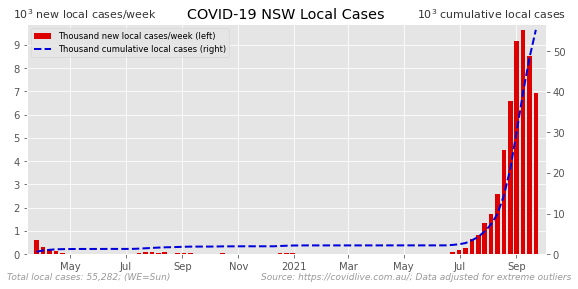

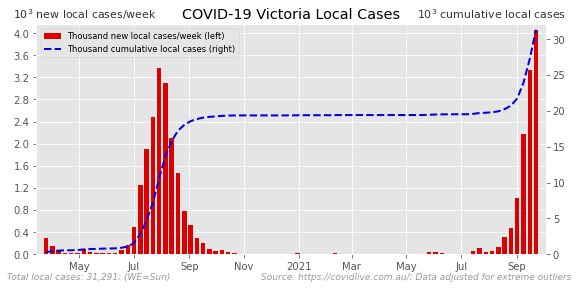

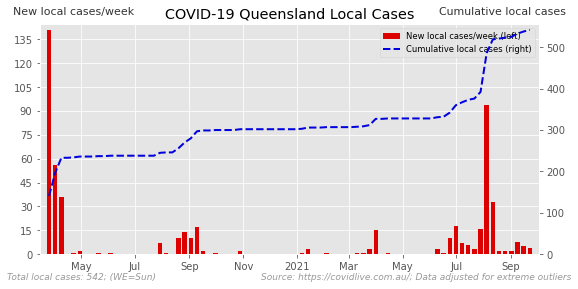

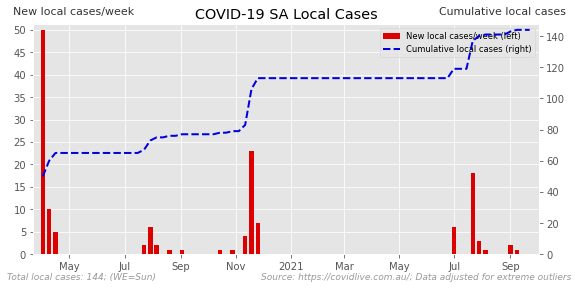

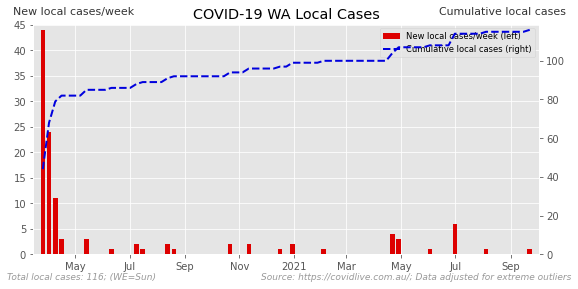

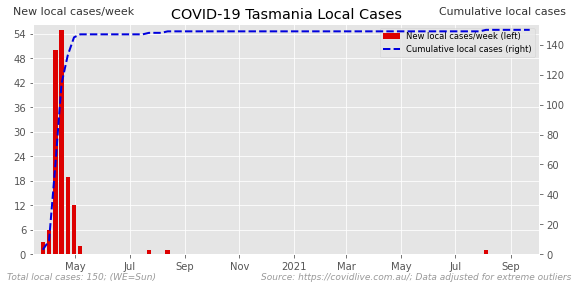

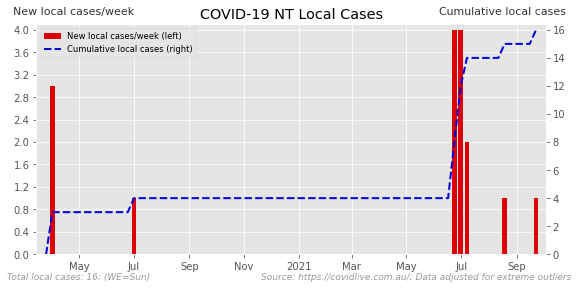

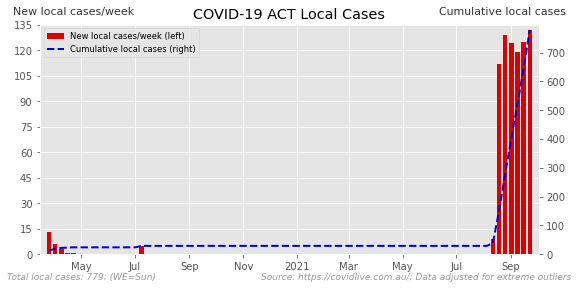

In [65]:
def plot_local_weekly():
    quality = pd.Series(dtype=str)
    for state in daily_u[LOCAL].columns:
        if (daily_u[LOCAL][state] == daily_c[LOCAL][state]).all():
            quality[state] = f'{SOURCE}; Original data'
        else:
            quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'

    desc = 'local cases'
    ps.plot_weekly(
        daily_c[LOCAL], desc, quality, 
        chart_directory=f'{CHART_DIRECTORY}-!{desc}-',
        show=True,
    )
    
plot_local_weekly()

### Recent local transmission daily charts

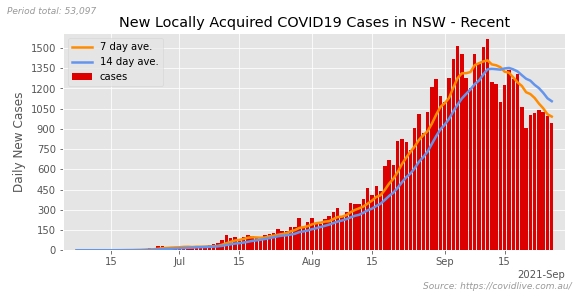

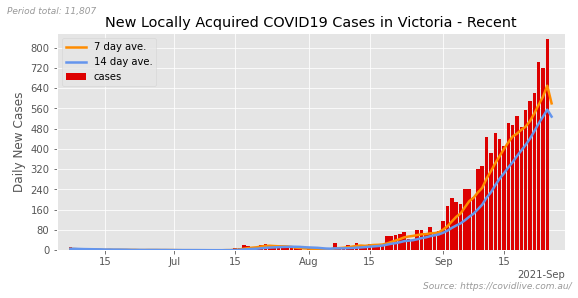

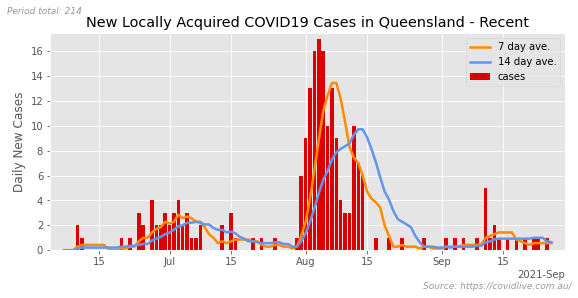

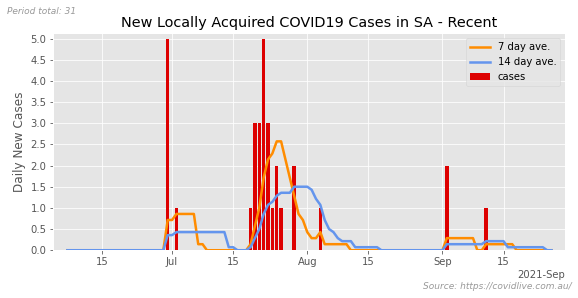

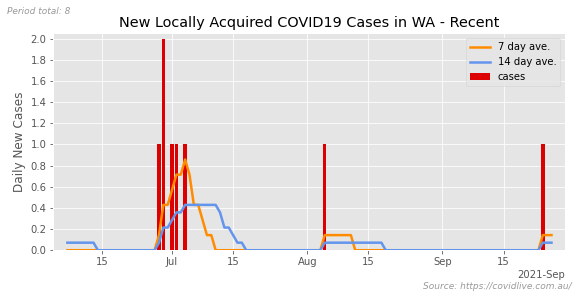

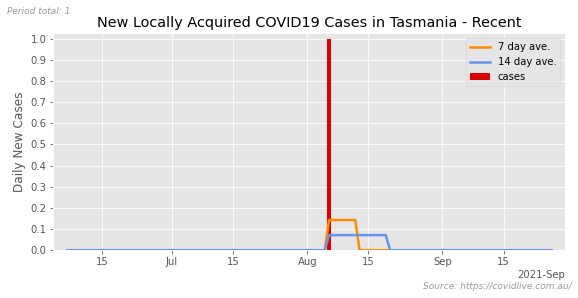

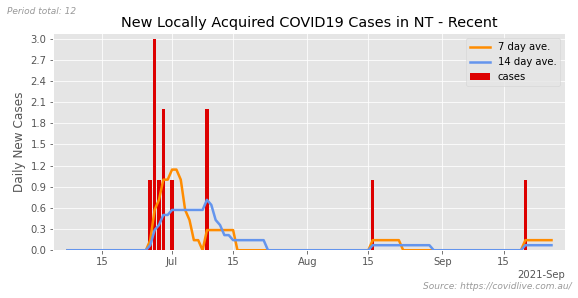

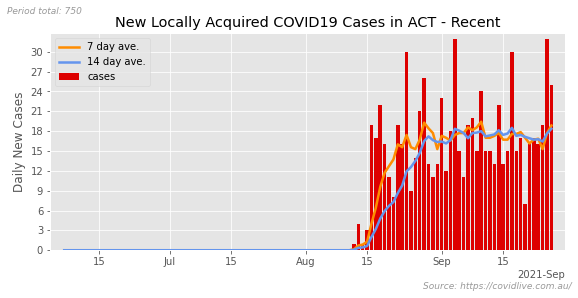

In [66]:
def recent_bar_with_ma_plot(df, mode):
    """plotting function - bar charts for daily local transmission,
       with 7 and 14 day moving averages."""
    
    # establish moving average periods
    MA1 = 7 # days
    MA2 = 14 # dats
    
    for col in df.columns:
        series = df[col]
        
        # bail if nothing to plot
        if series[-RECENT:].sum() <= 0: 
            continue
            
        # get plotables for recent period
        ma1 = series.rolling(MA1).mean()[-RECENT:]
        ma2 = series.rolling(MA2).mean()[-RECENT:]
        series = series[-RECENT:]
        
        # plot
        fig, ax = plt.subplots()
        ax.xaxis_date()
        ax.bar(series.index, series, label=mode, 
               color='#dd0000')
        ax.plot(ma1.index, ma1, label=f'{MA1} day ave.', 
                color='darkorange', lw=2.5)
        ax.plot(ma2.index, ma2, label=f'{MA2} day ave.', 
                color='cornflowerblue', lw=2.5)
        
        # annotate / finalise plot
        ax.legend(loc='best')
        title = (f'New Locally Acquired COVID19 {mode.title()} '
                 f'in {col} - Recent')
        ax.figure.text(x=0.01, y=0.99, 
                       s=f'Period total: {series.sum():,.0f}',
                       ha='left', va='top',
                       fontsize=9, fontstyle='italic',
                       color='#999999')
        ps.finalise_plot(ax, 
                         title=title, 
                         xlabel=None,
                         ylabel=f'Daily New {mode.title()}',
                         **std_plot_settings,
                        )
        
recent_bar_with_ma_plot(daily_c[LOCAL], "cases")

## Local outbreaks

Note: requires the SOI data for today to be updated.

### Supporting functions

In [67]:
def get_local_daily(state, start=None, stop=None):
    """Get local series for state. If specified, 
       limite the length of the series selected."""
    
    series = daily_c[LOCAL][state].dropna()
    
    if start:
        series = series[series.index >= pd.Timestamp(start)]

    if stop:
        if type(stop) == int:
            series = series.iloc[:stop]
        if type(stop) == str:
            series = series[series.index <= pd.Timestamp(stop)]

    return series

### Named outbreaks

In [68]:
# outbreaks:
# focusing on those after April 2020, 
# that last more than 21 days, 
# that have more than 100 cases in total,
# starting from the last zero-new-cases day of the outbreak

NSW_2020_Crossroads = {
    'NSW 08-Jul-20 (Crossroads)':   ['NSW',        '2020-07-08', 120],
}

NSW_2020_Avalon = {
    'NSW 16-Dec-20 (Avalon)':       ['NSW',        '2020-12-16', 120],
}

NSW_2021_Bondi = {
    'NSW 16-Jun-21 (Delta)':        ['NSW',        '2021-06-16',  None, ],
}

Vic_2020_wave2 = {
    'Vic 09-Jun-20 (2nd Wave)':     ['Victoria',   '2020-06-09',    100],
}

Vic_2021_Wollert = {
    'Vic 24-May-21 (Wollert)':      ['Victoria',   '2021-05-24', 36],
}

Vic_2021_Delta = {
    'Vic 04-Aug-21 (Delta)':        ['Victoria',   '2021-08-04',  None, ],    
}

Qld_2021_Delta = {
    'Qld 29-Jul-21 (Delta)':        ['Queensland', '2021-07-29',  40, ],     
}

ACT_2021_Delta = {
    'ACT 11-Aug-21 (Delta)':           ['ACT',        '2021-08-11',  None, ], 
}

older = {
    'Qld Jun-21':  ['Queensland', '2021-06-19',  40, ],
    'NT Jun-21':   ['NT',         '2021-06-25',  40, ],
    'WA Jun-21':   ['WA',         '2021-06-27',  40, ],  
    'SA Jun-21':   ["SA",         '2021-06-29',  16, ],
}

Older_outbreaks = {
    **NSW_2020_Crossroads,
    **NSW_2020_Avalon,
    **NSW_2021_Bondi,
    **Vic_2020_wave2,
    **Vic_2021_Wollert,
    **Vic_2021_Delta,
    **Qld_2021_Delta,
    **ACT_2021_Delta,
}

Current_outbreaks = {
    **NSW_2021_Bondi,
    **Vic_2021_Delta,
    **ACT_2021_Delta,
}

Vic_2020_vs_Delta = {
    **Vic_2020_wave2,
    **Current_outbreaks,
}

In [69]:
def plot_outbreaks(outbreaks, colours, span_days=100, **kwargs):

    serieses = {}
    tag = []
    for label, (state, start_date, reduced_span) in outbreaks.items():
        tag.append(state)
        span = reduced_span if reduced_span and reduced_span < span_days else span_days
        serieses[label] = get_local_daily(state, start=start_date, stop=span).reset_index(drop=True)
    outbreak_df = pd.DataFrame(serieses)

    # check day zero is zero, and day one is more than zero
    print(f'Checking: \n{outbreak_df.iloc[0:3]}')
    assert( (outbreak_df.iloc[0] == 0).all() )
    assert( (outbreak_df.iloc[1] > 0).all() )
    
    datasets = [outbreak_df, outbreak_df.cumsum()]
    ylabels =  ['New cases on day', 'Cumulative new cases']
    for ylabel, data in zip(ylabels, datasets):
        ax = data.plot(color=colours, lw=2.5)
        
        # add Henderson moving averages if we have enough data
        MA_TERM = 13 # must be odd
        if ylabel == ylabels[0] and len(data) >= MA_TERM:
            hma = pd.DataFrame()
            for col in data.columns:
                input_ = data[col].dropna()
                if len(input_) >= MA_TERM:
                    hma[col] = Henderson.Henderson(input_, MA_TERM)
            if not hma.empty:
                hma.columns = hma.columns + ' moving ave.'
                hma.plot(color=colours, lw=1, ls='-.', ax=ax, label=None)
            ax.legend(ncol=1, prop={'size': 8})

        # and finalise the plot
        if "title" not in kwargs:
            kwargs["title"] = 'Local Outbreak' + ('s' if len(data.columns) > 1 else '')
            kwargs["title"] = kwargs["title"] + ': ' + ", ".join(data.columns)
            if len(kwargs["title"]) > 60:
                kwargs["title"] = 'Local Outbreaks'
            
        ps.finalise_plot(ax,
            ylabel=ylabel,
            xlabel=f'Day of the outbreak',
            save_tag=f'-{ylabel.split()[0]}-{"-".join(tag)}',
            lfooter='Day zero is the last zero new cases day before new cases.',
            **kwargs, 
            **std_plot_settings,
        )



Checking: 
   Vic 09-Jun-20 (2nd Wave)  NSW 16-Jun-21 (Delta)  Vic 04-Aug-21 (Delta)  \
0                       0.0                    0.0                    0.0   
1                       4.0                    2.0                    7.0   
2                       8.0                    2.0                    6.0   

   ACT 11-Aug-21 (Delta)  
0                    0.0  
1                    1.0  
2                    4.0  


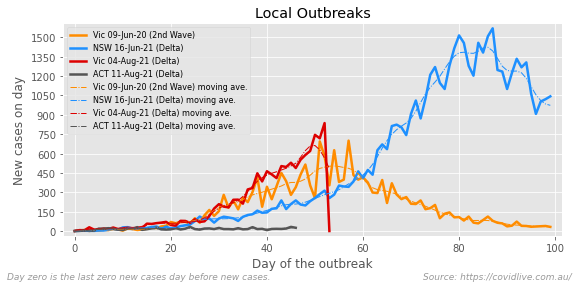

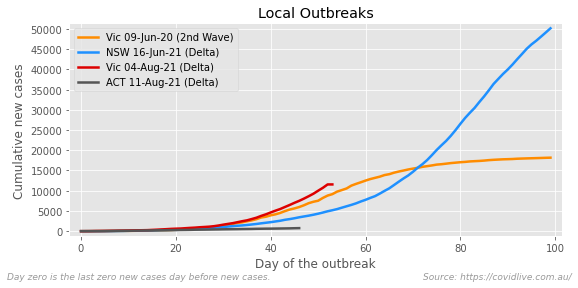

Checking: 
   Vic 09-Jun-20 (2nd Wave)  NSW 16-Jun-21 (Delta)  Vic 04-Aug-21 (Delta)  \
0                       0.0                    0.0                    0.0   
1                       4.0                    2.0                    7.0   
2                       8.0                    2.0                    6.0   

   ACT 11-Aug-21 (Delta)  
0                    0.0  
1                    1.0  
2                    4.0  


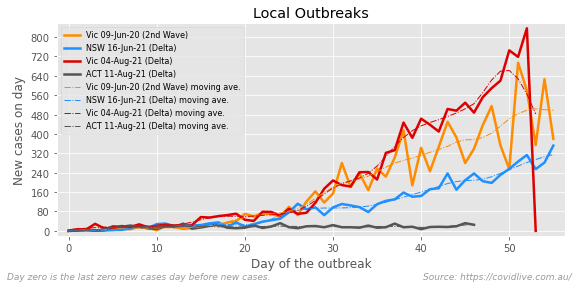

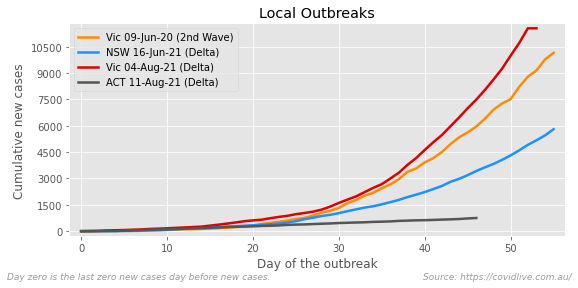

In [70]:
colours = ['darkorange', 'dodgerblue', '#dd0000', '#555555', 
           'royalblue', 'orchid', 'darkred']
plot_outbreaks(Vic_2020_vs_Delta, colours)
plot_outbreaks(Vic_2020_vs_Delta, colours, span_days=56)

### Outbreaks on a log scale

Note, our regression model is
$$
\begin{align*}
ln(y) & = b + kt\\
y & = e^{(b + kt)}\\
y & = e^b*e^{kt}\\
y & = ae^{kt}\\
\end{align*}
$$
The doubling time ...
$$
\begin{align*}
2a & = ae^{kt}\\
2 & = e^{kt}\\
ln(2) & = kt\\
t & = \frac{ln(2)}{k}\\
\end{align*}
$$

In [71]:
import statsmodels.api as sm
def get_exp_regression(series):
    """Get a predicted regression line and formula for plotting
       a line through exponential data
       Returns None if input data is problematic"""
    
    # sanity checks
    if (probs := (series <= 0) | series.isna()).any(): 
        probs = probs[probs].index.strftime("%Y-%m-%d")
        warn(f'Cannot do log regression for {name} as '
             f'there is bad data for dates: {probs}')
        return None 
    
    # index to an integer series starting at t=0
    log_series = np.log(series).reset_index(drop=True)
    
    # Stats model
    x = sm.add_constant(log_series.index.values, prepend=False)
    log_y = log_series.values
    model = sm.OLS(log_y, x)
    results = model.fit()
    #print(results.summary())
    y_predicted = np.exp(results.predict(x)) # in-sample prediction
    m, b = results.params
    a = np.exp(b)
    formula = f'$y={a:,.1f}e^' '{' f'{m:,.4f}t' '}$'
    
    return pd.Series(y_predicted, index=series.index), formula, m, a

In [72]:
def get_lin_regression(series):
    
    s = series.copy().reset_index(drop=True)
    
    # Stats model
    x = sm.add_constant(s.index.values, prepend=False)
    y = s.values
    model = sm.OLS(y, x)
    results = model.fit()
    y_predicted = results.predict(x) 
    m, b = results.params
    formula = f'$y={m:,.2f}t + {b:0.2f}$'
    
    return pd.Series(y_predicted, index=series.index), formula, m, b

In [73]:
def log_regression_plot(name, state, start, stop, 
                        tail=0.75, final_oos=0, forward=0):
    """plot an exponential regression line through the tail (fraction)
       of the data using with both a linear and log y-axis. 
       An out-of-sample projection plot can be provided for the very final 
       set of data points (number) if needed, useful for checking if trend 
       is bending away from exponential *OR* a forward projection can be made
       on the linear plot (only)."""

    # sanity checks
    if final_oos < 0 or final_oos == 1: return None
    if forward < 0 or forward == 1: return None
    
    # get data points
    data = get_local_daily(state, start, stop).iloc[1:] # ignore initial zero day
    print(f'Outbreak period {name}: {len(data)} days')
    
    # regression line through last portion of the data
    final_data = int(len(data) * tail)
    final_data = data.iloc[-final_data:-final_oos] if final_oos > 0 else data.iloc[-final_data:]
    result = get_exp_regression(final_data)
    if result is None: return None
    y_pred, formula, m, a = result
    if len(y_pred) < 2: return None

    # plot log scale and linear scale charts
    for approach in 'log', 'linear':
        title = f'Daily New Cases {name}'
        ylabel = 'Daily new cases'
        fig, ax = plt.subplots()
        ax.plot(y_pred.index, y_pred, 
            lw=2.5, 
            label=formula,
            color='dodgerblue',)
        ax.scatter(data.index, data, label='Daily new cases', s=10, c='red')
    
        # log or linear scale ...
        if approach == 'log':
            ax.set_yscale('log')
            title += ', log scale'
            ylabel += ' (log scale)'

        # out of sample projection
        if final_oos > 0 and forward == 0:
            t = range(len(y_pred), len(y_pred)+final_oos)
            out_of_sample = a * np.exp(m * t)
            #print(f'Out-ofsample: \n{out_of_sample}')
            unders = data[-final_oos:] - out_of_sample
            print('OOS data under or over projection:\n', unders)
            ax.plot(data.index[-final_oos:], out_of_sample,
               lw=2.5,
               label='Out of sample projection',
               ls=':',
               color='darkblue',)
            title += f', OOS={final_oos}-days'
            
        # forward projection
        if approach == 'linear' and forward > 0 and final_oos == 0:
            t = range(len(y_pred), len(y_pred)+forward)
            projection = a * np.exp(m * t)
            dates = [y_pred.index[0] + pd.Timedelta(days=x) for x in t]
            #print(f'Projection: \n{projection}')
            #print(f'Tally: {data.sum() + projection.sum()}')
            ax.plot(dates, projection,
               lw=2.5,
               label=f'{forward}-day projection',
               ls=':',
               color='darkblue',)
            title += f', FP={forward}-days'

        # finalise plot
        legend = ax.legend(loc='best')
        ps.finalise_plot(
            ax,
            title=title,
            ylabel=ylabel,
            xlabel=None,
            save_tag=f'-{approach}-{tail:.02f}',
            lfooter=f'Line of best fit through final {100*tail:.0f}% of data points: '
                    f'Implied doubling time: {np.log(2)/m:.2f} days.',
            **std_plot_settings,
        )

In [74]:
if False:

    for name, (state, start, stop) in Current_outbreaks.items():    
        print('=' * 50)
        print(name)

        # bog standard exponential regression over the whole outbreak period
        log_regression_plot(name, state, start, stop, forward=0)
    
        # a series of forward projection plots
        #log_regression_plot(name, state, start, stop, forward=7)
        #log_regression_plot(name, state, start, stop, forward=30)    
        #log_regression_plot(name, state, start, stop, forward=60)

        # let's look at the last few days as an out-of-sample projection
        #if any([state_abbrev in name for state_abbrev in ('Vic', 'NSW')]):
        #   log_regression_plot(name, state, start, stop, final_oos=7)
        
        # plot an early days of an outbreak chart
        #log_regression_plot(name, state, start, 28, tail=1.0)


### Multi-growth paths

In [75]:
def plot_multi_path(pathways):
    
    colours = ['dodgerblue', 'goldenrod', '#555555', 'darkorange', 'royalblue', ]
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colours)
    multi = {}
    
    counter = 0
    for yaxis in 'linear', 'log':
        for pathway in pathways:
            state, path_list = pathway
            fig, ax = plt.subplots()
        
            # construct the complex plot
            colour_counter = 0
            single = None
            for path in path_list:
                start, stop, method = path
                data = _get_data('CASE_CNT', state, start, stop)
            
                if 'exp' in method:
                    results = get_exp_regression(data)
                    if data is None:
                        print(f'You probably have zeros in this series, check dates. {data}')
                    series, formula, k, a = results
                    ax.plot(series.index, series, lw=2.5, c=colours[colour_counter],
                        label=f'{formula}; doubling time is {np.log(2)/k:.1f} days')
                
                if 'lin' in method:
                    series, formula, m, b = get_lin_regression(data)
                    ax.plot(series.index, series, lw=2.5, c=colours[colour_counter],
                        label=f'{formula}')
                    
                single = series if single is None else pd.concat([single, series])

                ax.scatter(data.index, data, c='red', s=10)
                colour_counter += 1

            multi[state] = single.reset_index(drop=True)
                
            # finalise single
            ax.legend(loc='best')
            ylabel='Daily New Cases'
            if yaxis == 'log':
                ax.set_yscale('log')
                ylabel += ' (log scale)'
            ps.finalise_plot(
                         ax,
                         title=F'Multiple growth paths - {state}',
                         save_tag=f'-{counter}',
                         ylabel=ylabel,
                         xlabel=None,
                         **std_plot_settings,
                        )
            counter += 1
            
        # plot comparative
        data = pd.DataFrame(multi)
        fig, ax = plt.subplots()
        data.plot(ax=ax, lw=2.5)
        ax.legend(loc='best')
        ylabel='Daily New Cases'
        if yaxis == 'log':
            ax.set_yscale('log')
            ylabel += ' (log scale)'
        ps.finalise_plot(
                         ax,
                         title=F'Comparative growth paths',
                         save_tag=f'-{counter}',
                         ylabel=ylabel,
                         xlabel=None,
                         **std_plot_settings,
                        )
        counter += 1


In [76]:
multi_state = (
    # tuple of tuples ...
    ('NSW', 
        [['2021-06-17', '2021-06-24', 'exponential'],
         ['2021-06-25', '2021-07-16', 'exponential'],
         ['2021-07-17', '2021-09-03', 'exponential'],
         ['2021-09-04', '2021-12-31', 'exponential'],]
    ),
    ('ACT',
        [['2021-08-12', '2021-08-17', 'exponential'],
         ['2021-08-18', '2021-12-31', 'exponential'],]
    ),
    ('Victoria',
        [['2021-08-05', '2021-08-09', 'exponential'],
         ['2021-08-10', '2021-09-12', 'exponential'],
         ['2021-09-13', '2021-09-19', 'exponential'],
         ['2021-09-20', '2021-12-31', 'exponential'],]
    ),
)


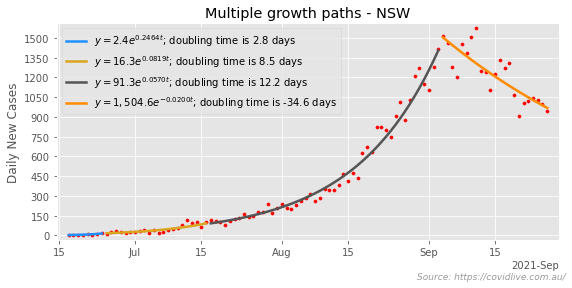

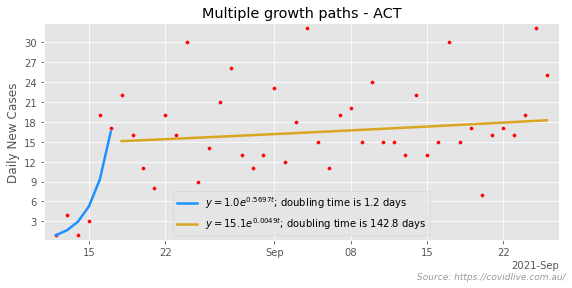

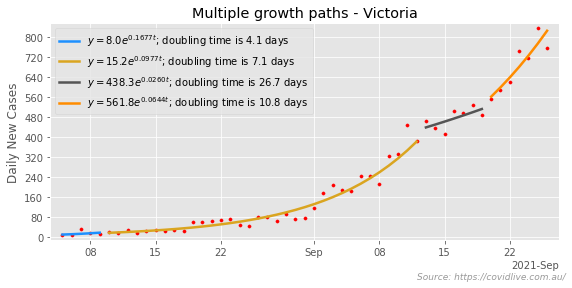

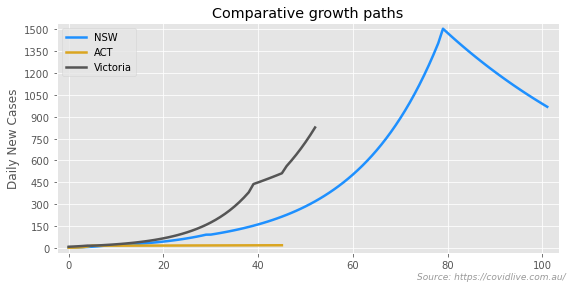

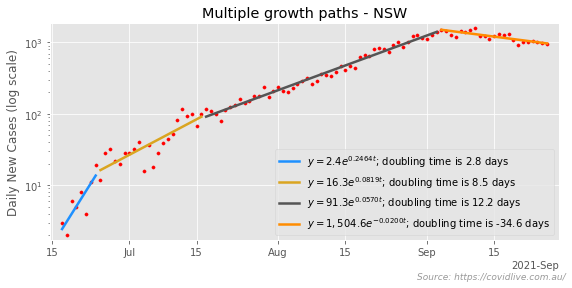

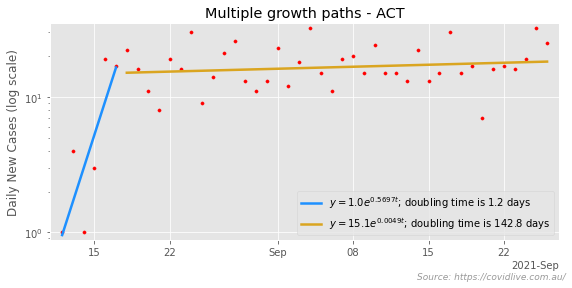

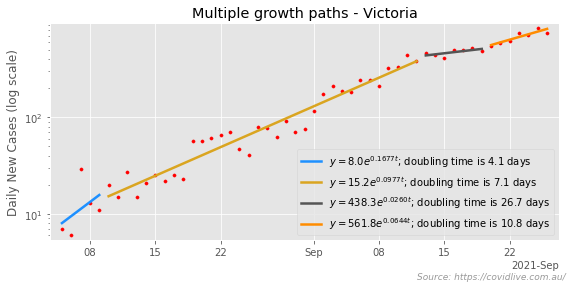

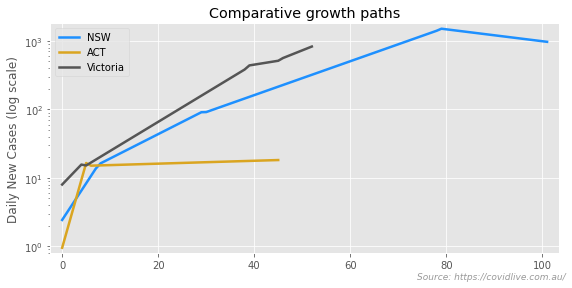

In [77]:
plot_multi_path(multi_state)


## Outbreak Growth Factors

### Rolling doubling time

In [78]:
# calculate using a regression best fit approach
def get_rolling_dt(name, state, start, stop, period):
    data = get_local_daily(state, start, stop).iloc[1:] # ignore initial zero day
    if len(data) <= period: return None
    
    series = pd.Series(np.nan, index=data.index)
    for start in range(0, len(data)-period+1):
        data_slice = data.iloc[start:start+period]
        result = get_exp_regression(data_slice)
        if result is None: return None
        y_pred, formula, k, a = result
        series[data_slice.index[-1]] = k

    series = series.dropna()
    lfooter = 'Calc. from best fit for data points in rolling window'
    return series, lfooter

In [79]:
# calculated from end-points on a Henderson smoothed series
def get_rolling_dt_hendo(name, state, start, stop, period):
    data = get_local_daily(state, start, stop).iloc[1:] # ignore initial zero day
    if len(data) <= period: return None
    data = pd.Series(Henderson.Henderson(data, period), index=data.index)
    data = data.where((data > 1) | data.isna(), other=1.0)
    series = pd.Series(np.nan, index=data.index)
    for start in range(0, len(data)-period+1):
        data_slice = data.iloc[start:start+period]
        k = np.log(data_slice.iloc[-1] / data_slice.iloc[0]) / period
        series[data_slice.index[-1]] = k

    series = series.dropna()
    lfooter = 'Calc. from end-points on smmothed series in rolling window'

    return series, lfooter

In [80]:
# this plotting function is a bit of a hack ...
def plot_exponents(data, name, period, lfooter, method=''):
    
    # constants
    MARGINS = 0.02
    
    # get canvass
    fig, ax = plt.subplots()
    ax.figure.set_size_inches((8, 4))
    ax.margins(MARGINS)
    ax.set_ylabel('$k$ from $y=ae^{kt}$') 
    
    # duplicate the axes
    axr = ax.twiny().twinx()
    axr.margins(MARGINS)
    axr.set_ylabel('Doubling time in days') 
    
    # No x-ticks at the top
    axr.xaxis.set_ticks([])
    axr.xaxis.set_ticklabels([])
        
    # plot the data
    if data.ndim == 1:
        ax.plot(data.index, data, lw=2.5)
        ax.set_xlabel(None)
        lfooter += f'. Latest DT: {np.log(2) / data.iloc[-1]:,.2f} days.'
    else:
        for col in data.columns:
            ax.plot(data[col].index, data[col], lw=2.5, label=col)
        ax.legend(loc='best')
        ax.set_xlabel(f'Day of Outbreak (after first {period} days)')
    
    # right-hand y-axis
    locations = ax.get_yticks()
    new_labels = [f'{np.log(2)/x:,.2f}' if x != 0 else '∞' for x in locations ]
    axr.yaxis.set_ticks(locations)
    axr.yaxis.set_ticklabels(new_labels)
    axr.set_axisbelow(True) 

    # remove the grid
    axr.grid(False, which='both')

    # match the left and right ylimit settings
    axr.set_ylim(ax.get_ylim()) 
    axr.set_xlim(ax.get_xlim())

    # title
    title = (f'{period}-day Rolling Growth - {name}')
    if method:
        title += f' ({method})'
    ax.set_title(title)
    
    fig.tight_layout(pad=1.1)
    
    # footers
    fig.text(0.01, 0.005, lfooter,
            ha='left', va='bottom',
            fontsize=9, fontstyle='italic',
            color='#999999')
    fig.text(0.99, 0.005, SOURCE,
            ha='right', va='bottom',
            fontsize=9, fontstyle='italic',
            color='#999999')

    # save
    filename = CHART_DIRECTORY + title + '.png'
    fig.savefig(filename, dpi=300)
    
    # display and close
    plt.show()
    plt.close('all')    

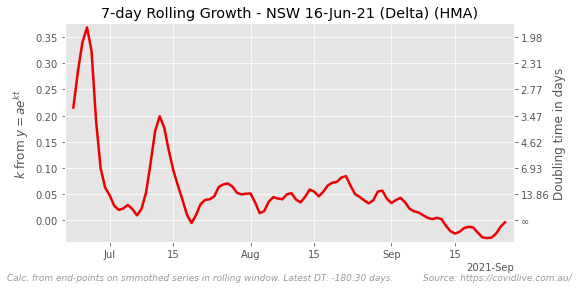

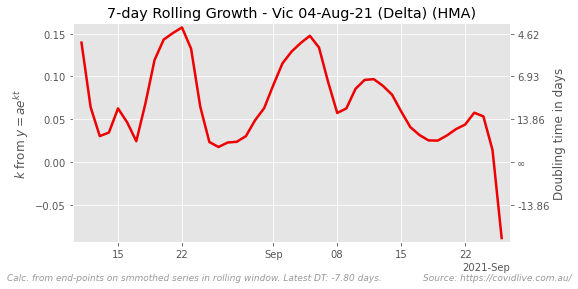

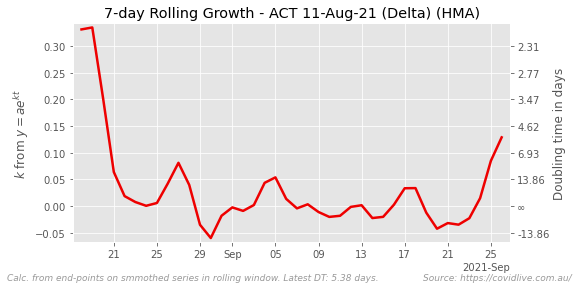

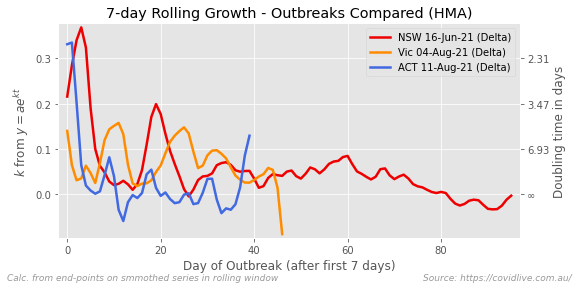

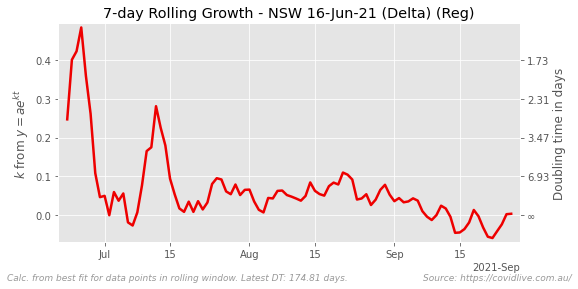

Cannot do log regression for Vic 04-Aug-21 (Delta) as there is bad data for dates: Index(['2021-09-26'], dtype='object', name='REPORT_DATE')


TypeError: cannot unpack non-iterable NoneType object

In [81]:
colours = ['#ee0000', 'darkorange', 'royalblue', '#555555']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colours)
for rolling in (7, 21):
    for function, method in zip((get_rolling_dt_hendo, get_rolling_dt), ('HMA', 'Reg')):
        combined = {}
        for name, (state, start, stop) in Current_outbreaks.items():
            series, lfooter = function(name, state, start, stop, rolling)
            combined[name] = series.reset_index(drop=True)
            plot_exponents(series, name, rolling, lfooter, method)

        plot_exponents(pd.DataFrame(combined), 'Outbreaks Compared', rolling, lfooter, method)

### Growth Factors

In [ ]:
GROWTH_FACTOR = 5
def plot_growth_factors():
    growth_factors = {}
    for name, (state, start, length) in Vic_2020_vs_Delta.items():
        s = get_local_daily(state, start=start, stop=length)
        print(f'Check {name} starting point: {s[:2].values}')
    
        growth_factors[name] = ps.plot_growth_factor(
            s,
            period=GROWTH_FACTOR,
            mode = 'new local cases',
            title=f'{GROWTH_FACTOR}-Day Growth Factor - {name}', 
            ylabel='Growth Factor',
            loc='lower center',
            xlabel=None,
            no_locator=True,
            **std_plot_settings
        )
        
    return growth_factors
        
growth_factors = plot_growth_factors()

### Model for the effective reproduction number $R_t$ using an SIR/SEIR model

In [ ]:
def model_effective_reproduction(newly_infected_on_day:pd.Series, 
                                 exposure_period:int=2,
                                 infectious_period:int=5):

    # The early data is volatile
    EARLY_NOISE = 3 # days
    IGNORE_INITIAL = infectious_period + exposure_period + EARLY_NOISE # days 
    SMOOTH_TERM = 15
    
    # sanity check
    if len(newly_infected_on_day) < SMOOTH_TERM:
        print(f'Insufficient data to calculate the effective reproduction number')
        return None
    
    # smooth infections data
    newly_infected_smoothed = Henderson.Henderson(newly_infected_on_day, SMOOTH_TERM)
    #newly_infected_smoothed = newly_infected_on_day # skip smoothing
    
    infectious_t_minus_1 = (
        newly_infected_smoothed
        .rolling(infectious_period).sum()
        .shift(exposure_period + 1) # exposure period and t-1 here
        .dropna()
    )
    
    R_t = (newly_infected_smoothed / infectious_t_minus_1 * infectious_period)[IGNORE_INITIAL:]
    return R_t, exposure_period, infectious_period
    

In [ ]:
def plot_reproduction_numbers():
    repo_numbers = {}
    for name, (state, start, length) in Vic_2020_vs_Delta.items():
    
        # calculate
        span = length if length else 120 # days
        s = get_local_daily(state, start=start, stop=span)
        results = model_effective_reproduction(s)
        if results is None:
            continue
        R_t, e_period, i_period = results
        repo_numbers[name] = R_t
    
        # plot
        fig, ax = plt.subplots()
        ax.plot(R_t.index.values, R_t.values, lw=2.5, label=name)
        ax.axhline(y=1, color='#999999', lw=0.5, linestyle='-')
        ps.finalise_plot(ax,
                        title=f'Effective Reproduction Number ($R_t$) - {name}',
                        ylabel='$R_t$',
                        xlabel=None,
                        lfooter='$R_{t}$ at series end: ' f'{R_t[-1]:0.3f};  Assumptions: '
                                f'exposure={e_period} days; infectious={i_period} days',
                        **std_plot_settings,
                        )
    
    return repo_numbers

repo_numbers = plot_reproduction_numbers()

### Comparative $R_t$ and GF

Note that the 5-day on 5-day growth factor is a good proxy for the effective reproduction number (in this case).

In [ ]:
def plot_comparative_Rt_GF(repo_numbers, growth_factors):
    
    frames = {}
    MAX_FACTOR = 6 # used for capping the y axis (None to ignore)
    for name, series in repo_numbers.items():
    
        period = GROWTH_FACTOR 
        dict_frame = {}
        rt_label = 'Eff. reproduction num. ($R_t$)'
        dict_frame[rt_label] = series
        if name in growth_factors:
            shift = int(-period // 2) + 1
            shifted = growth_factors[name].shift(shift)
            dict_frame[f'{period}-day on {period}-day growth '
                      f'factor shifted {shift} days'] = shifted
        
        frames[name] = pd.DataFrame(dict_frame).dropna(how='all')
        frames[name] = frames[name][frames[name][rt_label].notna()]
            
        fig, ax = plt.subplots()
        colours = ['#dd0000', 'darkorange', 'royalblue', ]
        tag = 'At end:  '
        for col in frames[name].columns:
            line = frames[name][col].copy()
            tag += f'{col}: {line.dropna()[-1]:0.1f}   '
            if MAX_FACTOR:
                line = line.where(line < MAX_FACTOR, other=np.nan)
            ax.plot(line.index.values, line.values, lw=2.5, 
                    c=colours.pop(), label=col)
        ax.axhline(y=1, lw=0.5, c='#999999')
        ax.legend(loc='best', prop={'size': 8})
        ps.finalise_plot(ax,
                         title=f'COVID-19 Growth - {name}',
                         ylabel='Factor / Number',
                         lfooter=tag,
                         xlabel=None,
                         **std_plot_settings,
                        )

plot_comparative_Rt_GF(repo_numbers, growth_factors)

### Short-run projections for local new case growth
$$
y = x_{0}e^{kt}; 
$$
Where ...
$$
k = \frac{ln(\frac{x_t}{x_{t-n}})}{n}
$$

In [ ]:
def extrapolate(name, state, start, stop):
    """Construct an exponential short-run projection based on recent period growth.
       Note: on small numbers, this model can be overwhelmed by noise."""
    
    # projection parameters
    outlook = 15 # projection days
    term = 15 # days - term for henderson moving average
    pperiod = [3, 7,] # most recent days for establishing growth projection
    
    # get current underlying trend
    s = get_local_daily(state, start=start, stop=stop)
    if len(s) <= term: 
        print(f'{name}: insufficient data for a forecast')
        return
    s_smoothed = Henderson.Henderson(s, term)

    # calculate daily exponetial growth rate
    INDEX_CASE = -1
    stop = max(0, s_smoothed[INDEX_CASE])
    projections = {}
    for period in pperiod:
        if period > term: continue
        if period > len(s_smoothed): continue
        start = max(0, s_smoothed[-period])
        if start == 0: continue
        k = np.log(stop/start) / period
        #print(f'start, stop, k: {start, stop, k}')
        projection = np.arange(0, outlook)
        projection = stop * np.exp(projection * k)
        projection = pd.Series(projection, 
                               index = pd.date_range(s.index[INDEX_CASE], 
                                         periods=outlook, freq='D'))
        projection = projection.drop(projection.index[0])
        projections[f'Projection based on last {period} days of smoothed series ~ $y='
                    f'{stop:,.2f}' 'e^{' f'{k:.4f}t' '}$'] = projection
        print(f'{period}: {projection.round(1).to_list()}')
    
    pframe = {'Historic cases': s,
              'Smoothed cases': s_smoothed,
              **projections}
    pframe = pd.DataFrame(pframe)
    

    colours = ['#dd0000', 'darkorange', 'dodgerblue', 'darkblue']
    lw = [2.5, 1, 2.5, 2.5, 2.5]
    fig, ax = plt.subplots()
    for i, col in enumerate(pframe.columns.to_list()):
        line = pframe[col]
        ax.plot(line.index, line, c=colours[i], lw=lw[i], label=col)
    
    ax.legend(loc='best', prop={'size': 8})
    ps.finalise_plot(ax, 
                     title=f'Outbreak Projection for {name}',
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     **std_plot_settings,
                    )


In [ ]:
if True:
    
    for name, (state, start, stop) in Current_outbreaks.items():
        extrapolate(name, state, start, stop)


## The End

In [ ]:
print_warnings()
print('Finished')